# Loading Data

# Import Required Libraries

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

# Data Exploration and Analysis

In [87]:
# load dataset
pd.set_option('display.max_columns', None)
data_original = pd.read_csv('bc-student-outcomes-program-data-viewer-file-2021-to-2023.csv')
data_original

CREDENTIAL                       GROUPBY INSTITUTION  \
0     Certificate       Institution and Program         NLC   
1     Certificate       Institution and Program         NLC   
2     Certificate       Institution and Program         SEL   
3     Certificate       Institution and Program         SEL   
4     Certificate       Institution and Program         SEL   
...           ...                           ...         ...   
2097      Diploma  Institution and Program Area        NVIT   
2098      Diploma  Institution and Program Area        NVIT   
2099      Diploma  Institution and Program Area        NVIT   
2100      Diploma  Institution and Program Area        NVIT   
2101      Diploma  Institution and Program Area        CAPU   

                           INSTITUTION_NAME PROGRAM_AREA  \
0                   Northern Lights College            6   
1                   Northern Lights College            6   
2                           Selkirk College            3   
3                           Selkirk College            4   
4                           Selkirk College            4   
...                                     ...          ...   
2097  Nicola Valley Institute of Technology            1   
2098  Nicola Valley Institute of Technology            3   
2099  Nicola Valley Institute of Technology            4   
2100  Nicola Valley Institute of Technology            5   
2101                    Capilano University            1   

                     PROGRAM_AREA_NAME  \
0                            Education   
1                            Education   
2              Business and Management   
3                               Health   
4                               Health   
...                                ...   
2097                 Arts and Sciences   
2098           Business and Management   
2099                            Health   
2100  Engineering and Applied Sciences   
2101                 Arts and Sciences   

                                        PROGRAM_NAME  RESPONDENTS  \
0                                Education Assistant           39   
1                    Education Assistant Certificate           27   
2     Office Administration & Technology Certificate           27   
3                                 Nursing Unit Clerk           53   
4                              Health Care Assistant           93   
...                                              ...          ...   
2097                                    All Programs           14   
2098                                    All Programs           12   
2099                                    All Programs           27   
2100                                    All Programs           14   
2101                                    All Programs          169   

      RESPONSE_RATE   AGE  FEMALE    MALE    Q49A   Q51NA   Q51NB   Q51ND  \
0            0.6393  41.0 -2.0000 -1.0000  0.9743  0.9705  0.9444  0.9736   
1            0.5510  42.0 -2.0000 -1.0000  0.9615  0.9090  0.8695  0.9230   
2            0.6136  36.0 -2.0000 -1.0000  0.8518  1.0000  0.6956  0.6923   
3            0.5047  37.0 -2.0000 -1.0000  0.7924  0.7027  0.5517  0.6578   
4            0.5670  36.0  0.9032  0.0967  0.9347  0.8500  0.8928  0.9418   
...             ...   ...     ...     ...     ...     ...     ...     ...   
2097         0.6666  48.5 -2.0000 -1.0000  1.0000  1.0000  0.9285  0.7692   
2098         0.6315  40.5  1.0000  0.0000  0.9166  0.8333  0.8333  0.7500   
2099         0.6750  36.0 -2.0000 -1.0000  1.0000  0.9259  1.0000  0.9615   
2100         0.3684  31.0  0.4285  0.5714  0.8571  1.0000  1.0000  0.9230   
2101         0.5596  23.0  0.6390  0.3609  0.9277  0.8303  0.8166  0.9146   

      Q51NE1  Q51NE2   Q51NI   Q51NJ    Q52A  SELF_EMPLOYED  EMPLOY_FULL_TIME  \
0     0.9743  0.8461  0.9487  1.0000  1.0000        -6.0000            0.5428   
1     0.8846  0.9629  1.0000  0.8518  0.9629        -6.0000            0.7083   
2     0.8888  0.7916  0.777

In [89]:
#Creating a copy of original data set
data = data_original.copy()

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CREDENTIAL           2102 non-null   object 
 1   GROUPBY              2102 non-null   object 
 2   INSTITUTION          2102 non-null   object 
 3   INSTITUTION_NAME     2102 non-null   object 
 4   PROGRAM_AREA         2102 non-null   object 
 5   PROGRAM_AREA_NAME    2102 non-null   object 
 6   PROGRAM_NAME         2102 non-null   object 
 7   RESPONDENTS          2102 non-null   int64  
 8   RESPONSE_RATE        2102 non-null   float64
 9   AGE                  2102 non-null   float64
 10  FEMALE               2102 non-null   float64
 11  MALE                 2102 non-null   float64
 12  Q49A                 2102 non-null   float64
 13  Q51NA                2102 non-null   float64
 14  Q51NB                2102 non-null   float64
 15  Q51ND                2102 non-null   f

In [92]:
data.describe()

RESPONDENTS  RESPONSE_RATE          AGE       FEMALE         MALE  \
count   2102.000000    2102.000000  2102.000000  2102.000000  2102.000000   
mean     191.318268       0.494679    27.473121    -0.011110    -0.430435   
std      988.596133       0.114453     5.099054     0.979682     1.812471   
min       10.000000       0.162700    18.000000    -3.000000    -5.000000   
25%       21.000000       0.413700    25.000000    -1.000000    -1.000000   
50%       40.000000       0.488150    26.000000     0.440900     0.310150   
75%      102.000000       0.565200    29.500000     0.674875     0.541325   
max    27549.000000       1.000000    53.000000     1.000000     1.000000   

              Q49A        Q51NA        Q51NB        Q51ND       Q51NE1  \
count  2102.000000  2102.000000  2102.000000  2102.000000  2102.000000   
mean      0.905641     0.825071     0.809833     0.858180     0.908733   
std       0.084016     0.121326     0.116917     0.100155     0.068451   
min       0.111100     0.000000     0.000000     0.375000     0.500000   
25%       0.875000     0.761900     0.744925     0.807000     0.875000   
50%       0.918600     0.847700     0.823800     0.877500     0.916600   
75%       0.956500     0.909000     0.893400     0.928500     0.952300   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Q51NE2        Q51NI        Q51NJ         Q52A  SELF_EMPLOYED  \
count  2102.000000  2102.000000  2102.000000  2102.000000    2102.000000   
mean      0.850029     0.881928     0.896388     0.935832      -8.950762   
std       0.092430     0.072400     0.075411     0.070906      23.951736   
min       0.388800     0.466600     0.411700     0.303000     -99.000000   
25%       0.802150     0.846225     0.859700     0.911700      -6.000000   
50%       0.861100     0.888800     0.907900     0.951200      -3.000000   
75%       0.913000     0.928325     0.944400     0.985150       0.000000   
max       1.000000     1.000000     1.000000     1.000000       0.716600   

       EMPLOY_FULL_TIME  JOB_PROGRAM_RELATED  USEFUL_PERFORM_JOB  IN_LABR_MKT  \
count       2102.000000          2102.000000         2102.000000  2102.000000   
mean         -11.503596             0.739386            0.846907     0.911049   
std           27.485203             0.206001            0.125734     0.102865   
min          -99.000000             0.000000            0.125000     0.142800   
25%           -9.000000             0.611100            0.795975     0.880625   
50%            0.545400             0.785150            0.873950     0.943150   
75%            0.891000             0.900000            0.933300     0.978875   
max            1.000000             1.000000            1.000000     1.000000   

          EMPLOYED   UNEMPLOYED    SALARY_WAGE  FURTH_STUDIES       Q11_7  \
count  2102.000000  2102.000000    2102.000000    1656.000000  207.000000   
mean     -3.565723   -46.175716   16583.333325       0.373285    0.860477   
std       7.279576    49.336193   27710.889258       0.219424    0.083756   
min     -99.000000   -99.000000     -99.000000       0.000000    0.571400   
25%     -11.000000   -99.000000      20.852500       0.200000    0.812500   
50%       0.716900    -1.500000      26.500000       0.343950    0.857100   
75%       0.857100     0.067050   42527.730000       0.519625    0.921500   
max       1.000000     0.416600  145000.000000       1.000000    1.000000   

            Q52_6  
count  239.000000  
mean     0.612088  
std      0.160636  
min      0.000000  
25%      0.500000  
50%      0.613600  
75%      0.724100  
max      1.000000

In [93]:
#Shape of data
data.shape

(2102, 32)

<AxesSubplot:>

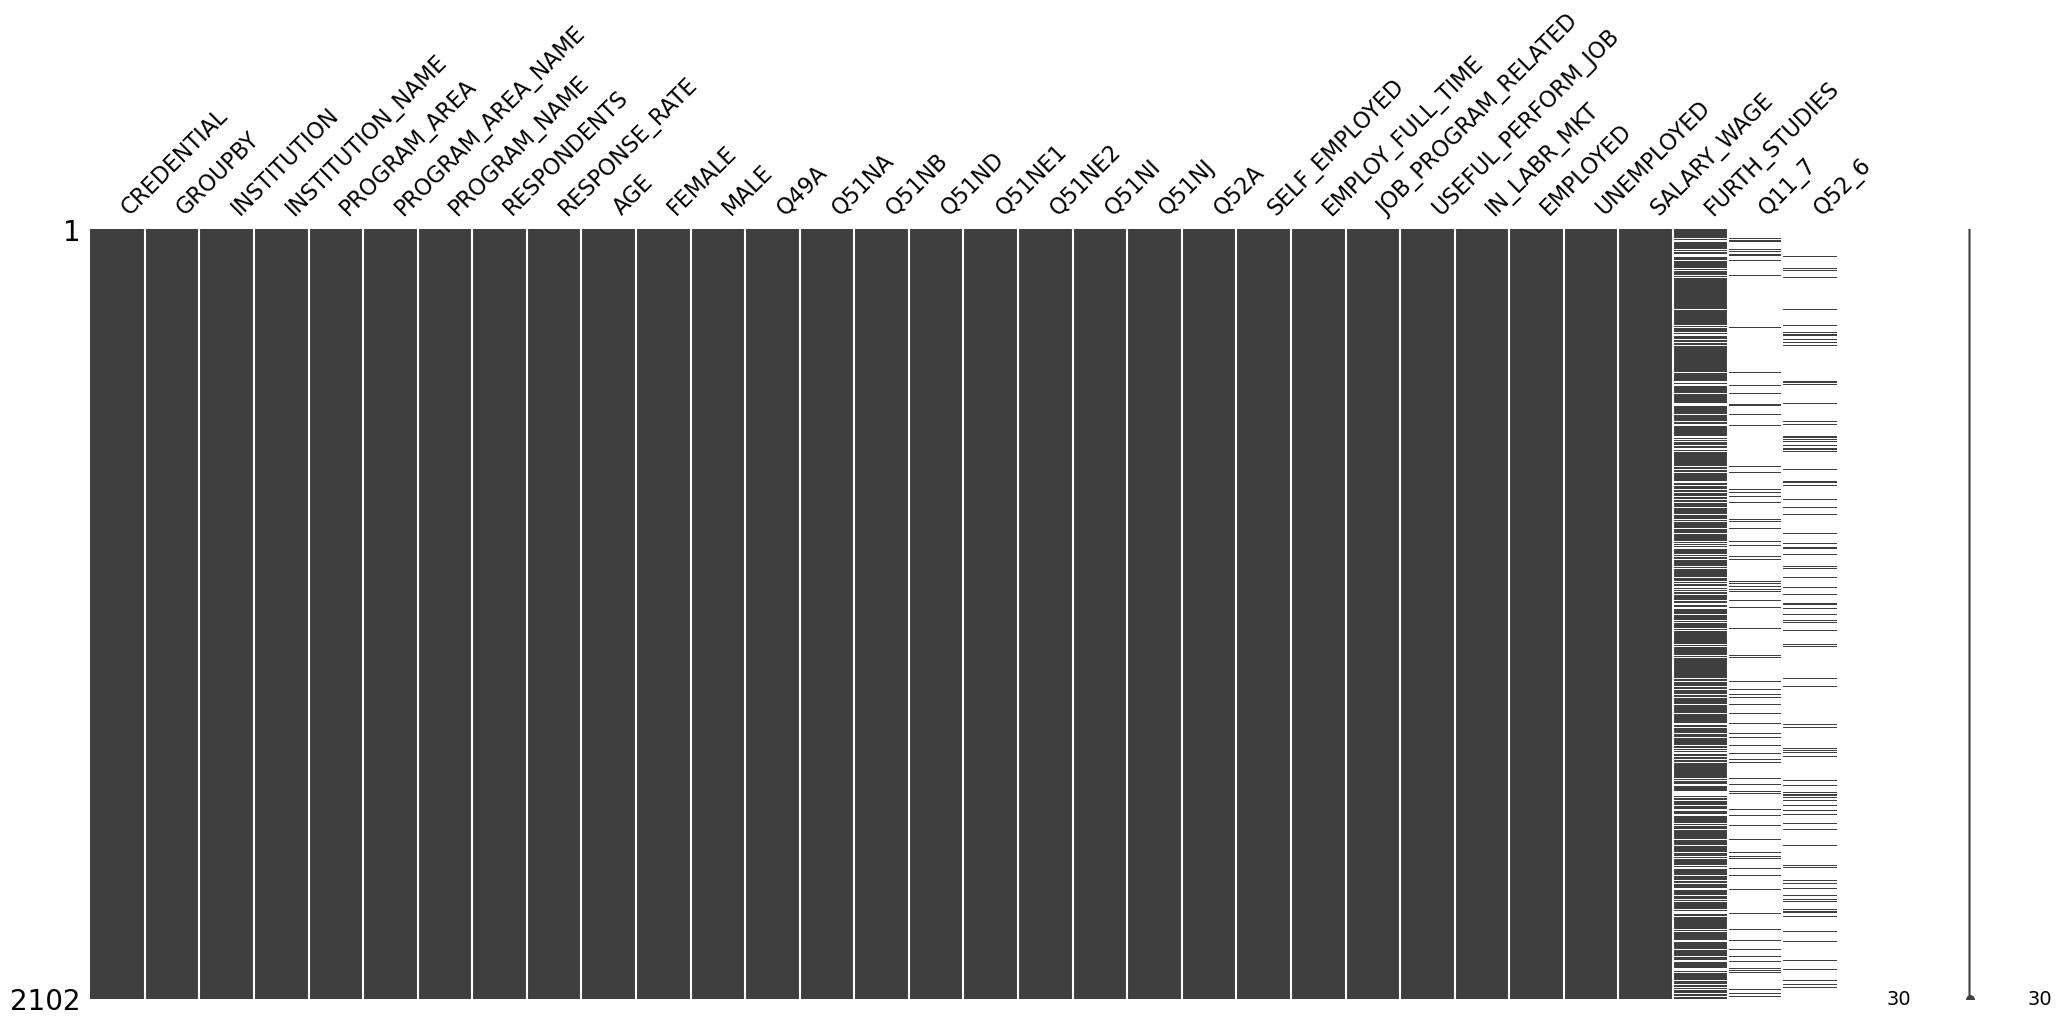

In [94]:
# Visualising Missing Values
import missingno as msno
msno.matrix(data.sample(2102))

In [95]:
data.isnull().sum()

CREDENTIAL                0
GROUPBY                   0
INSTITUTION               0
INSTITUTION_NAME          0
PROGRAM_AREA              0
PROGRAM_AREA_NAME         0
PROGRAM_NAME              0
RESPONDENTS               0
RESPONSE_RATE             0
AGE                       0
FEMALE                    0
MALE                      0
Q49A                      0
Q51NA                     0
Q51NB                     0
Q51ND                     0
Q51NE1                    0
Q51NE2                    0
Q51NI                     0
Q51NJ                     0
Q52A                      0
SELF_EMPLOYED             0
EMPLOY_FULL_TIME          0
JOB_PROGRAM_RELATED       0
USEFUL_PERFORM_JOB        0
IN_LABR_MKT               0
EMPLOYED                  0
UNEMPLOYED                0
SALARY_WAGE               0
FURTH_STUDIES           446
Q11_7                  1895
Q52_6                  1863
dtype: int64

In [96]:
# Checking duplicate rows
data.duplicated().sum()

0

In [97]:
# see are the missing value by Percentage
missing_percentage = data.isnull().sum().sort_values(ascending=False)/len(data)*100
missing_percentage

Q11_7                  90.152236
Q52_6                  88.629876
FURTH_STUDIES          21.217888
GROUPBY                 0.000000
SALARY_WAGE             0.000000
UNEMPLOYED              0.000000
EMPLOYED                0.000000
IN_LABR_MKT             0.000000
USEFUL_PERFORM_JOB      0.000000
JOB_PROGRAM_RELATED     0.000000
EMPLOY_FULL_TIME        0.000000
SELF_EMPLOYED           0.000000
Q52A                    0.000000
Q51NJ                   0.000000
Q51NI                   0.000000
Q51NE2                  0.000000
CREDENTIAL              0.000000
Q51ND                   0.000000
Q51NB                   0.000000
Q51NA                   0.000000
Q49A                    0.000000
MALE                    0.000000
FEMALE                  0.000000
AGE                     0.000000
RESPONSE_RATE           0.000000
RESPONDENTS             0.000000
PROGRAM_NAME            0.000000
PROGRAM_AREA_NAME       0.000000
PROGRAM_AREA            0.000000
INSTITUTION_NAME        0.000000
INSTITUTIO

# Checking Correlation Matrix

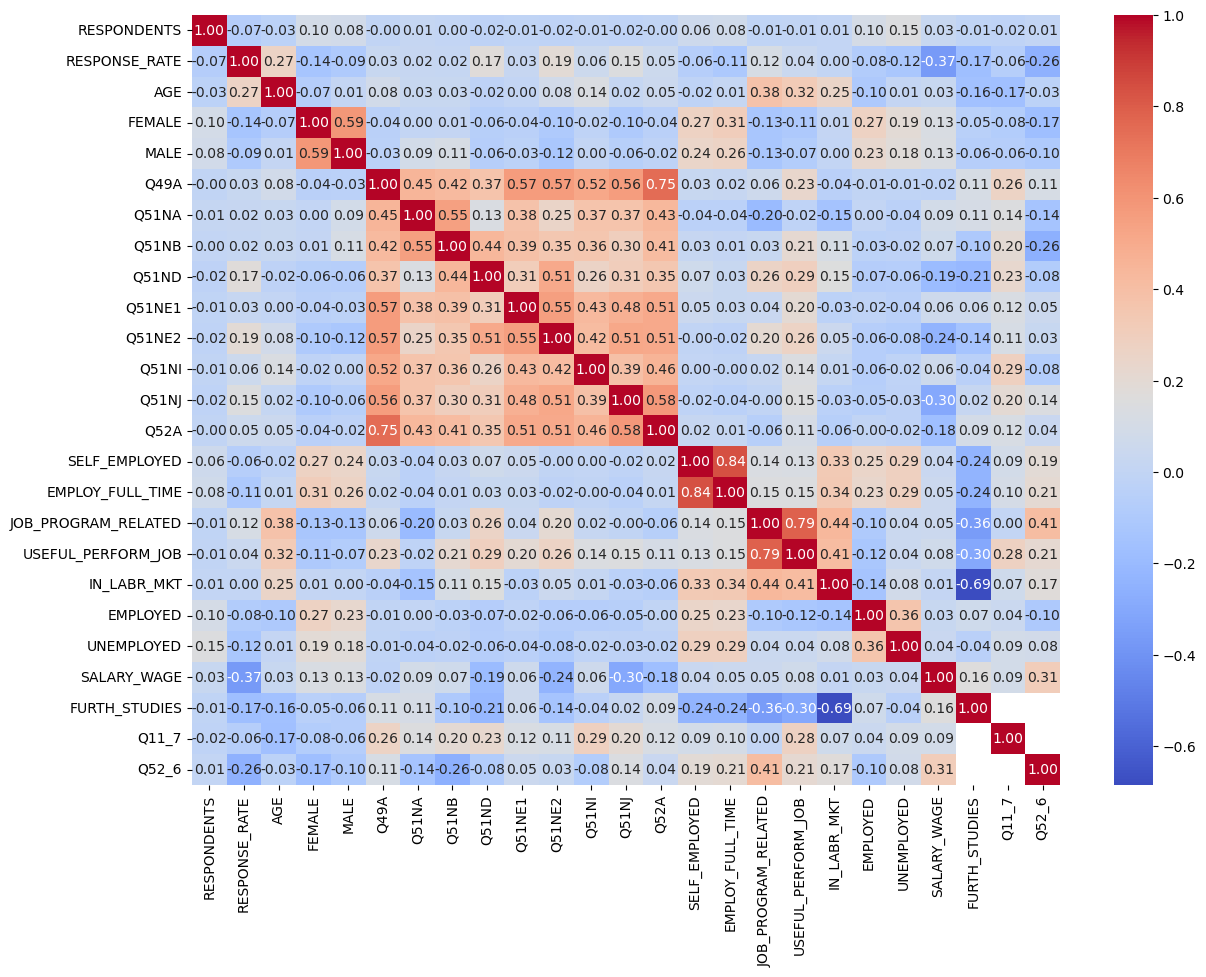

In [98]:
# Set the figure size
plt.figure(figsize=(14, 10))  # Adjust the width and height as needed

# Generate and display the heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show plot
plt.show()

In [99]:
# Drop columns with over 85% missing values
data.drop(columns=['Q11_7', 'Q52_6'], inplace=True)

# Impute missing values in FURTH_STUDIES with the median
data['FURTH_STUDIES'].fillna(data['FURTH_STUDIES'].median(), inplace=True)
data['AGE'] = data['AGE'].astype(int)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CREDENTIAL           2102 non-null   object 
 1   GROUPBY              2102 non-null   object 
 2   INSTITUTION          2102 non-null   object 
 3   INSTITUTION_NAME     2102 non-null   object 
 4   PROGRAM_AREA         2102 non-null   object 
 5   PROGRAM_AREA_NAME    2102 non-null   object 
 6   PROGRAM_NAME         2102 non-null   object 
 7   RESPONDENTS          2102 non-null   int64  
 8   RESPONSE_RATE        2102 non-null   float64
 9   AGE                  2102 non-null   int64  
 10  FEMALE               2102 non-null   float64
 11  MALE                 2102 non-null   float64
 12  Q49A                 2102 non-null   float64
 13  Q51NA                2102 non-null   float64
 14  Q51NB                2102 non-null   float64
 15  Q51ND                2102 non-null   f

# Data Preprocessing

In [153]:
def replace_supression_codes(column, majority_threshold=50):
    # Replace -99 with NaN for median calculation
    cleaned_column = column.replace(-99, np.nan)
    
    # Calculate median value
    median_value = cleaned_column.median()

    # If median_value is NaN, return the column without modification
    if pd.isna(median_value):
        return column  # or handle it differently if needed

    # Calculate values for majority and minority
    majority_value = median_value + (median_value * (majority_threshold / 100))
    minority_value = median_value - (median_value * (majority_threshold / 100))

    # Define specific values for 5% and 95% conditions
    less_than_5_value = median_value * 0.01  # 1% of the median
    greater_than_95_value = median_value * 0.99  # 99% of the median

    # Impute values without introducing NaN
    return column.replace({
        -99: 0,  # Too few responses to report -> 0
        -1: np.nan,  # Set to Null
        -2: majority_value,  # Majority were female
        -3: less_than_5_value,  # Fewer than 5% -> replace with 1% of median
        -4: greater_than_95_value,  # More than 95% -> replace with 99% of median
        -5: median_value,  # Majority were male
        -6: minority_value,  # Minority self-employed
        -7: median_value,  # Majority self-employed
        -8: minority_value,  # Minority full-time
        -9: median_value,  # Majority full-time
        -10: minority_value,  # Minority employed
        -11: median_value,  # Majority employed
        -12: minority_value,  # Minority unemployed
        -13: median_value,  # Majority unemployed
    })

# Apply the function to relevant columns
data['FEMALE'] = replace_supression_codes(data['FEMALE'])
data['MALE'] = replace_supression_codes(data['MALE'])
data['SELF_EMPLOYED'] = replace_supression_codes(data['SELF_EMPLOYED'])
data['EMPLOY_FULL_TIME'] = replace_supression_codes(data['EMPLOY_FULL_TIME'])
data['EMPLOYED'] = replace_supression_codes(data['EMPLOYED'])
data['UNEMPLOYED'] = replace_supression_codes(data['UNEMPLOYED'])

# Output the modified DataFrame
print(data)

       CREDENTIAL                       GROUPBY INSTITUTION  \
0     Certificate       Institution and Program         NLC   
1     Certificate       Institution and Program         NLC   
2     Certificate       Institution and Program         SEL   
3     Certificate       Institution and Program         SEL   
4     Certificate       Institution and Program         SEL   
...           ...                           ...         ...   
2097      Diploma  Institution and Program Area        NVIT   
2098      Diploma  Institution and Program Area        NVIT   
2099      Diploma  Institution and Program Area        NVIT   
2100      Diploma  Institution and Program Area        NVIT   
2101      Diploma  Institution and Program Area        CAPU   

                           INSTITUTION_NAME PROGRAM_AREA  \
0                   Northern Lights College            6   
1                   Northern Lights College            6   
2                           Selkirk College            3   
3  

In [181]:
data['SALARY_WAGE'].describe()

count      2102.000000
mean      16583.333325
std       27710.889258
min         -99.000000
25%          20.852500
50%          26.500000
75%       42527.730000
max      145000.000000
Name: SALARY_WAGE, dtype: float64

In [183]:
df['PROGRAM_AREA_NAME'].unique()

array(['Education', 'Business and Management', 'Health',
       'Human and Social Services', 'Visual and Performing Arts',
       'Arts and Sciences', 'Engineering and Applied Sciences', 'Trades',
       'All CIP Clusters', 'Social Sciences', 'Humanities',
       'Biological Science and Life Sciences',
       'Physical Sciences and Math',
       'Culinary Arts and Personal Services',
       'Industrial and Heavy Duty Mechanics and Other Repair Trades',
       'Automotive and Other Mechanics', 'Carpentry', 'Electrician',
       'Welding and Precision Production', 'Plumbing',
       'Other Apprenticeship Programs',
       'Other Trades Foundation Programs'], dtype=object)

# Median wage/salary. For BGS: Annual salary. For all others: Hourly wage

In [185]:
def convert_to_hourly(wage):
    # Define the conversion factor
    annual_to_hourly_conversion_factor = 12 * 4 * 40 
    if wage > 200:
        return wage / annual_to_hourly_conversion_factor 
    else:
        return wage 

df['SALARY_WAGE'] = df['SALARY_WAGE'].apply(convert_to_hourly)

# EDA

## Distribution of Educational Credentials in the Dataset

In [186]:
credential_counts = data["CREDENTIAL"].value_counts()
credential_counts

Bachelor's Degree    604
Diploma              521
Certificate          424
Trades Foundation    239
Apprenticeship       207
Associate Degree     107
Name: CREDENTIAL, dtype: int64

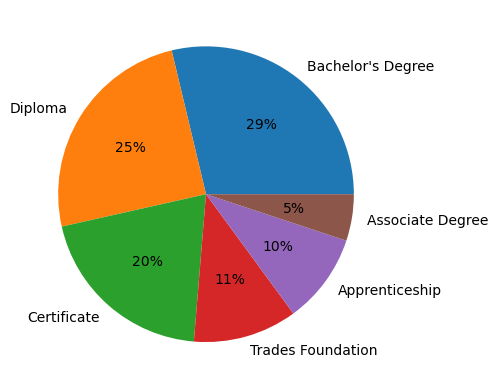

In [187]:
plt.pie(credential_counts, labels=credential_counts.index, autopct='%1.0f%%')
plt.show()

## Filter Selections



In [188]:
groupby_counts = data["GROUPBY"].value_counts()
groupby_counts

Institution and Program         1446
Institution and Program Area     499
Institution                      104
Program Area                      47
All Institutions                   6
Name: GROUPBY, dtype: int64

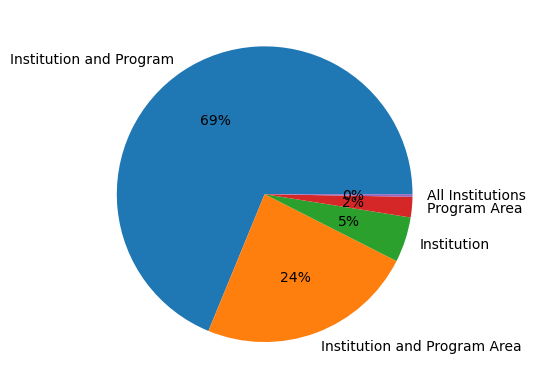

In [189]:
plt.pie(groupby_counts, labels=groupby_counts.index, autopct='%1.0f%%')
plt.show()

## Frequency Distribution of Institutions in the Dataset

In [190]:
institution_name_counts = data["INSTITUTION_NAME"].value_counts()
institution_name_counts

British Columbia Institute of Technology    259
Thompson Rivers University                  135
Camosun College                             127
Okanagan College                            109
Kwantlen Polytechnic University             109
Vancouver Island University                 103
University of British Columbia Vancouver    103
Douglas College                             102
Langara College                             100
University of the Fraser Valley              94
Vancouver Community College                  93
College of New Caledonia                     76
Capilano University                          73
College of the Rockies                       66
Selkirk College                              65
North Island College                         64
Simon Fraser University                      64
University of Victoria                       63
Northern Lights College                      50
All Institutions                             44
University of British Columbia Okanagan 

In [191]:
total_institutions = data["INSTITUTION_NAME"].nunique()
total_institutions

28

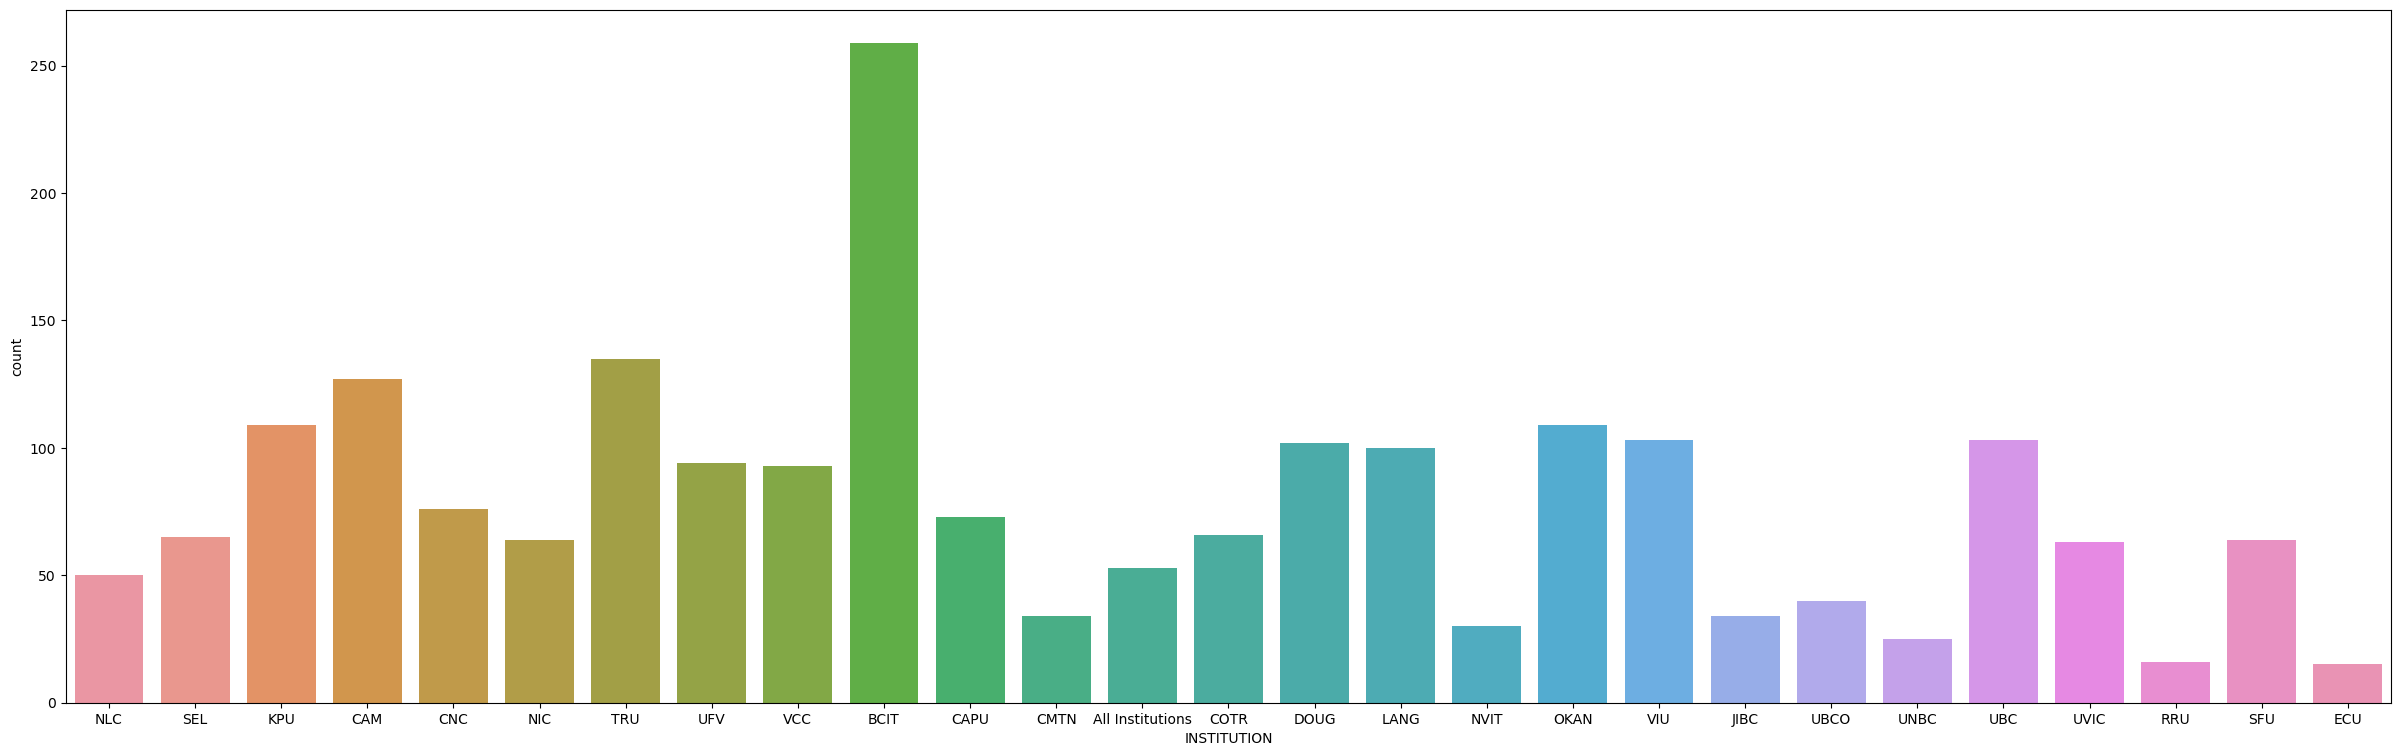

In [192]:
plt.figure(figsize = (30,9))
sns.countplot(x = 'INSTITUTION', data = data)
plt.show()

## Frequency Distribution of Program Areas in the Dataset

In [193]:
program_area_name_counts = data["PROGRAM_AREA_NAME"].value_counts()

program_area_name_counts

Business and Management                                        300
Engineering and Applied Sciences                               261
Health                                                         228
Human and Social Services                                      192
Arts and Sciences                                              157
Visual and Performing Arts                                     120
All CIP Clusters                                               110
Social Sciences                                                 89
Industrial and Heavy Duty Mechanics and Other Repair Trades     77
Automotive and Other Mechanics                                  75
Welding and Precision Production                                66
Education                                                       65
Humanities                                                      62
Biological Science and Life Sciences                            54
Culinary Arts and Personal Services                           

In [194]:
total_program_name_area = data["PROGRAM_AREA_NAME"].nunique()
total_program_name_area

22

In [195]:
program__name_counts = data["PROGRAM_NAME"].value_counts()
program__name_counts

All Programs                                              656
Bachelor of Science in Nursing                             12
Health Care Assistant                                      11
Bachelor of Business Administration                         9
Bachelor of Social Work                                     7
                                                         ... 
Graphic Design Diploma                                      1
Jewellery Art & Design                                      1
Forestry Technology Diploma                                 1
Fisheries and Aquaculture Technology Diploma                1
Applied Business Technology - Administrative Assistant      1
Name: PROGRAM_NAME, Length: 1141, dtype: int64

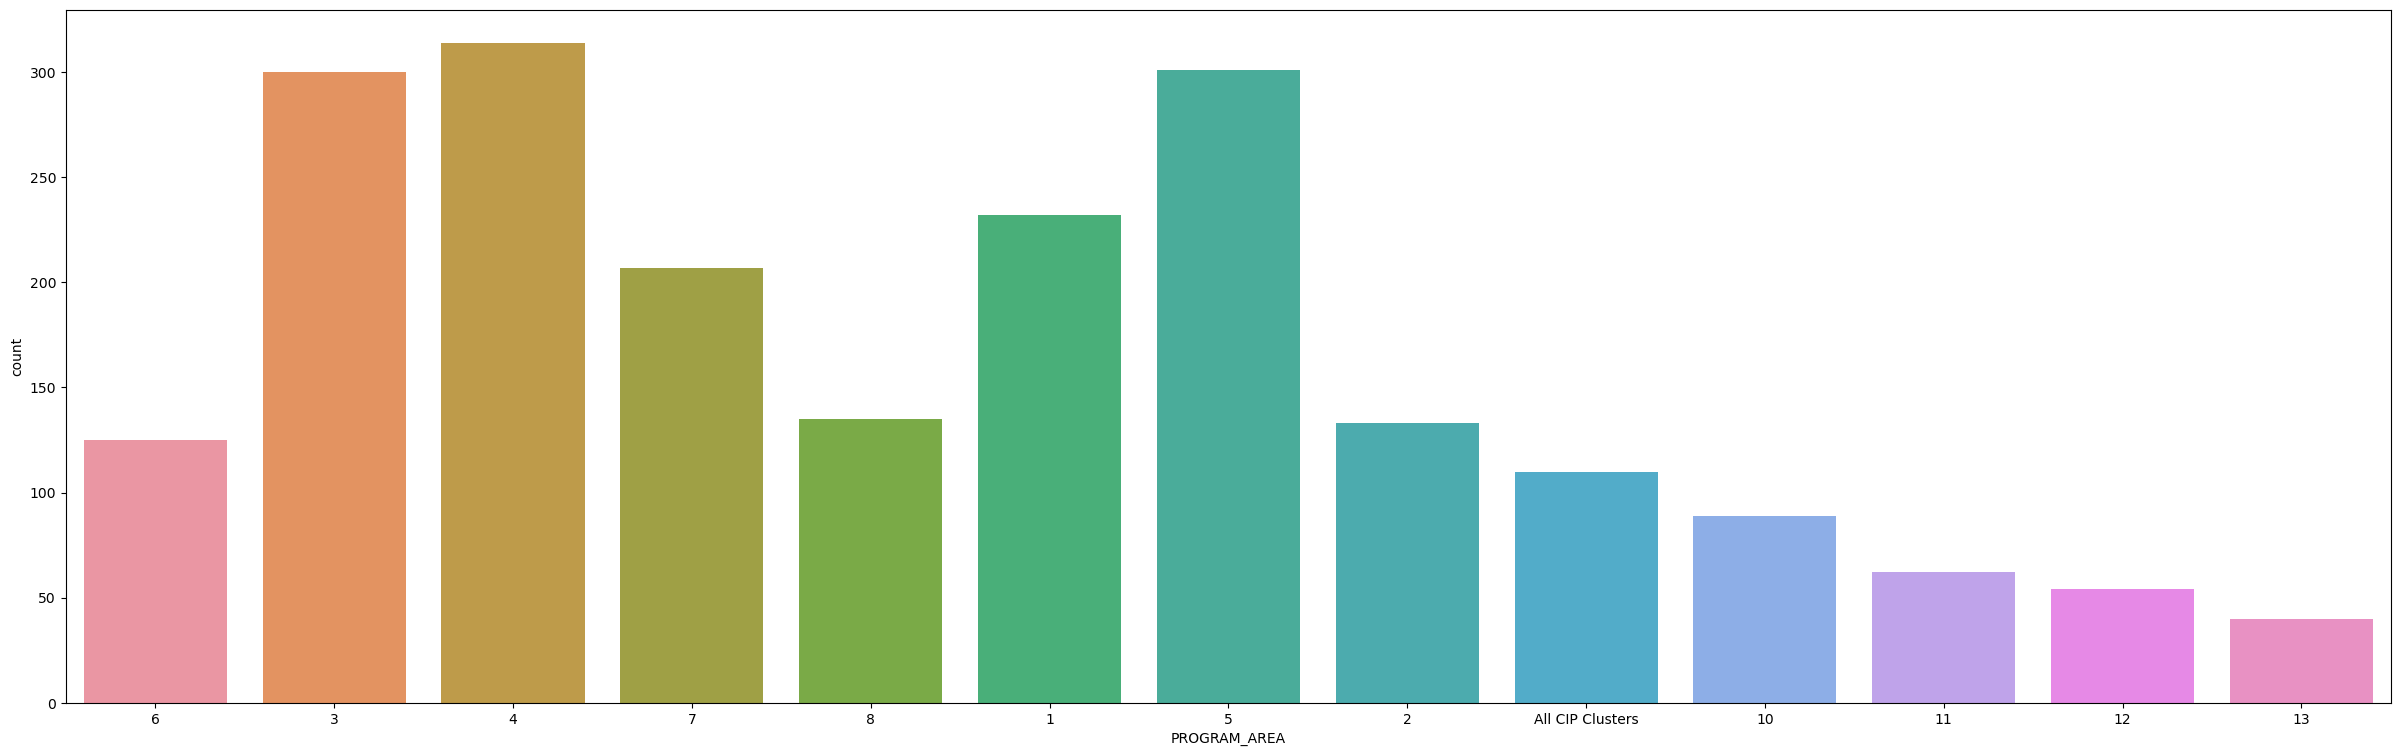

In [196]:
plt.figure(figsize = (30,9))
sns.countplot(x = 'PROGRAM_AREA', data = data)
plt.show()

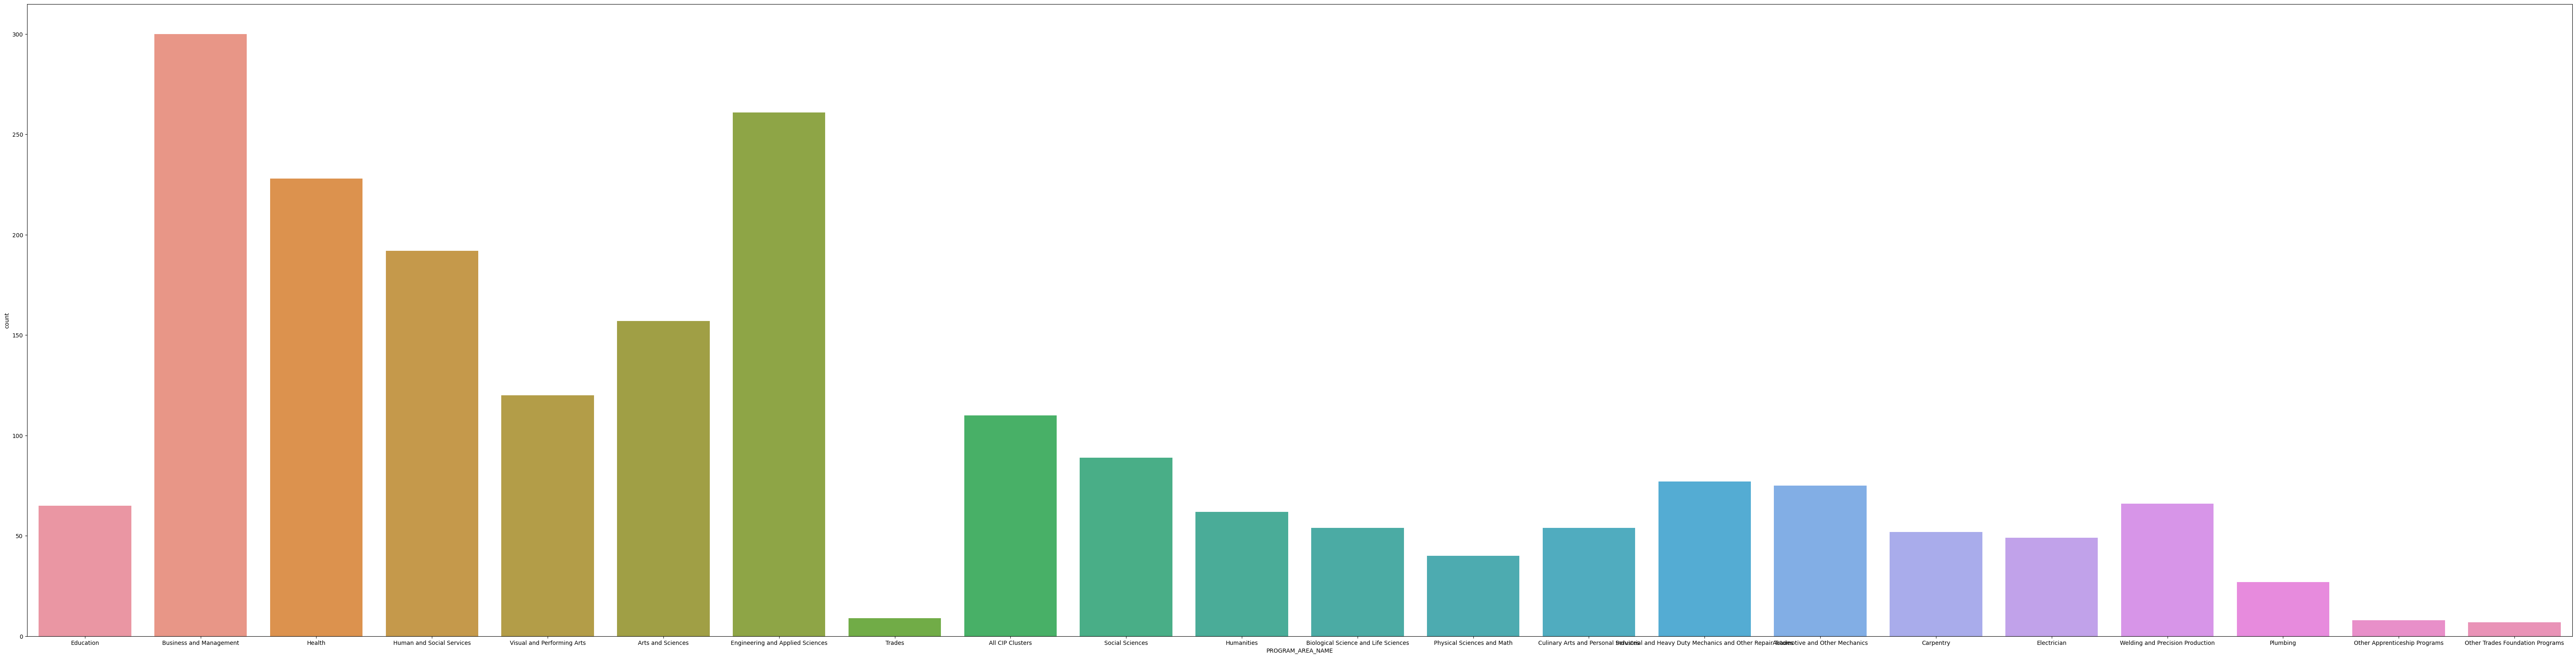

In [197]:
plt.figure(figsize = (80,20))
sns.countplot(x = 'PROGRAM_AREA_NAME', data = data)
plt.show()

## Univariate Analysis : Continuous Variables

## Distribution of Age

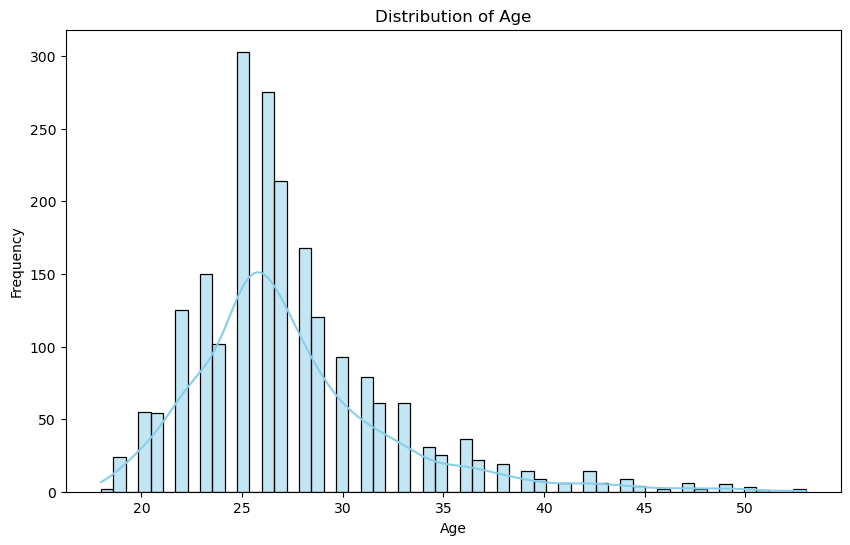

In [198]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, kde=True, x='AGE', color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Female Proportion

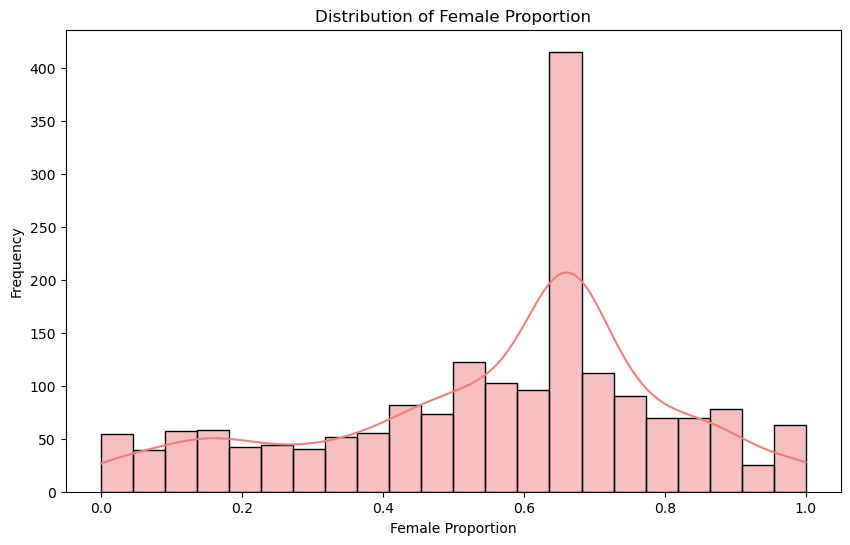

In [199]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, kde=True, x='FEMALE', color='lightcoral')
plt.title("Distribution of Female Proportion")
plt.xlabel("Female Proportion")
plt.ylabel("Frequency")
plt.show()

## Distribution of Male Proportion

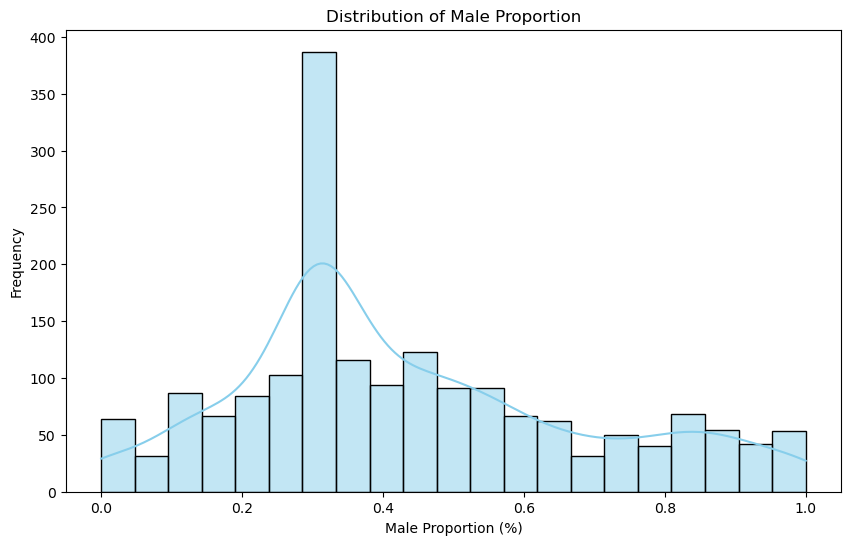

In [200]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, kde=True, x='MALE', color='skyblue')

# Add title and labels
plt.title("Distribution of Male Proportion")
plt.xlabel("Male Proportion (%)")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

## Distribution of Satisfaction Levels: Q49A Analysis

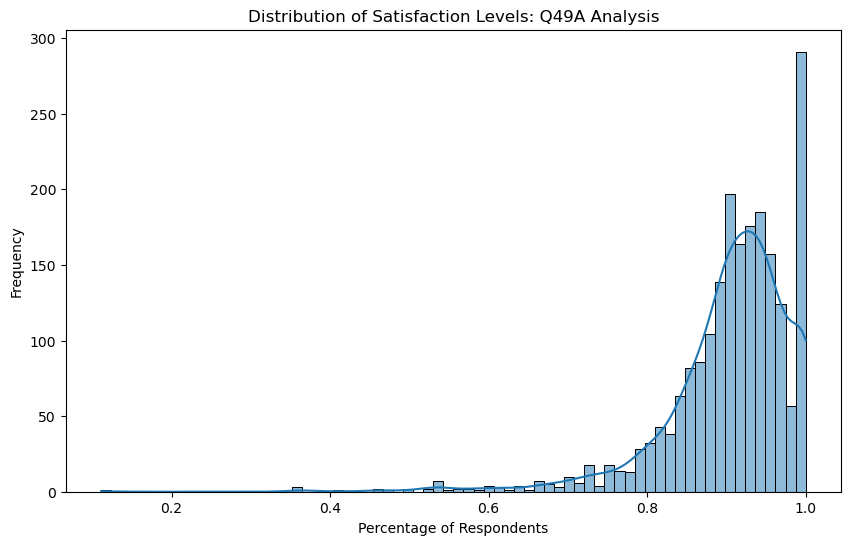

In [201]:
# Q49A: % who said they were "Very satisfied" or "Somewhat satisfied" with their education or training
plt.figure(figsize=(10, 6))
sns.histplot(data=data, kde=True, x='Q49A')

# Add title and labels
plt.title('Distribution of Satisfaction Levels: Q49A Analysis')
plt.xlabel('Percentage of Respondents')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

## Q51NA Analysis: % of Respondents Rating the Institution/Program as "Very Helpful" or "Helpful" in Skill Development

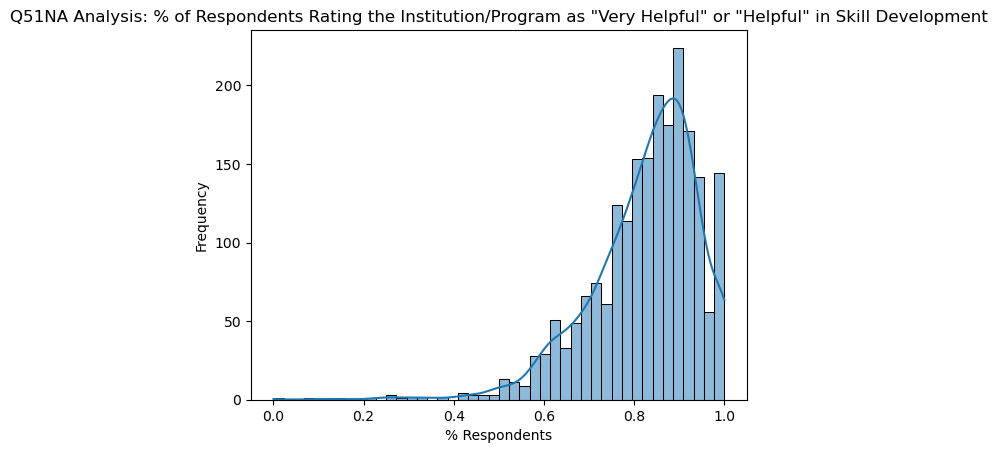

In [202]:
# Histogram for Q51NA
sns.histplot(data=data, kde=True, x='Q51NA')

# Add title and labels
plt.title('Q51NA Analysis: % of Respondents Rating the Institution/Program as "Very Helpful" or "Helpful" in Skill Development')
plt.xlabel('% Respondents')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

## Q51NB Analysis: % of Respondents Rating the Institution/Program as "Very Helpful" or "Helpful" in Speaking Effectively

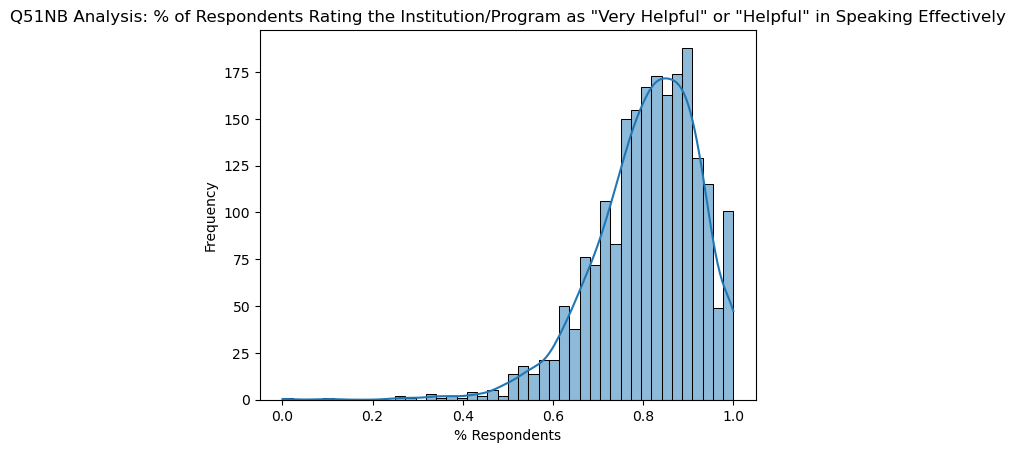

In [203]:
# Histogram for Q51NB
sns.histplot(data=data, kde=True, x='Q51NB')

# Add title and labels
plt.title('Q51NB Analysis: % of Respondents Rating the Institution/Program as "Very Helpful" or "Helpful" in Speaking Effectively')
plt.xlabel('% Respondents')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

## Q51ND Analysis: % of Respondents Rating the Institution/Program as "Very Helpful" or "Helpful" in Working Effectively with Others

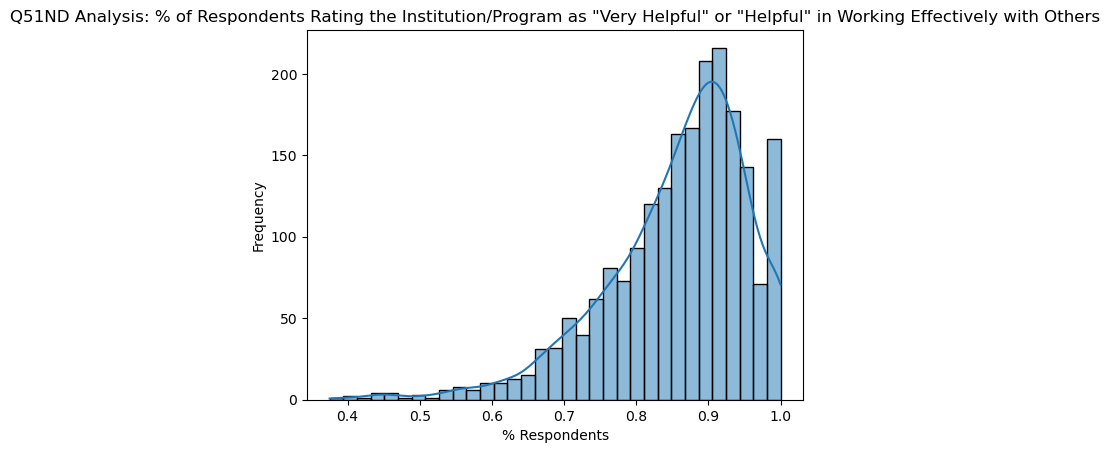

In [204]:
# Histogram for Q51ND
sns.histplot(data=data, kde=True, x='Q51ND')

# Add title and labels
plt.title('Q51ND Analysis: % of Respondents Rating the Institution/Program as "Very Helpful" or "Helpful" in Working Effectively with Others')
plt.xlabel('% Respondents')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

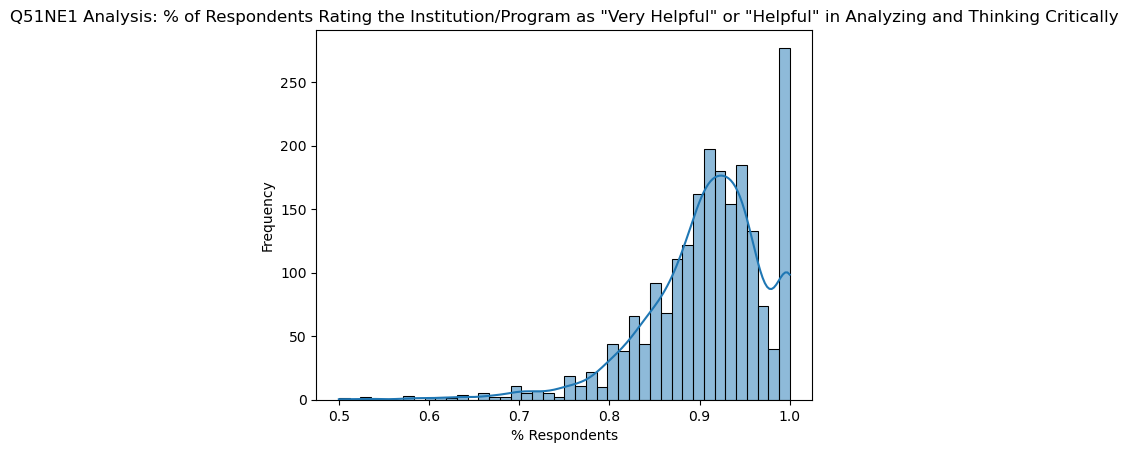

In [205]:
# Histogram for Q51NE1
sns.histplot(data=data, kde=True, x='Q51NE1')

# Add title and labels
plt.title('Q51NE1 Analysis: % of Respondents Rating the Institution/Program as "Very Helpful" or "Helpful" in Analyzing and Thinking Critically')
plt.xlabel('% Respondents')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

## Q51NE2: Resolve Issues or Problems

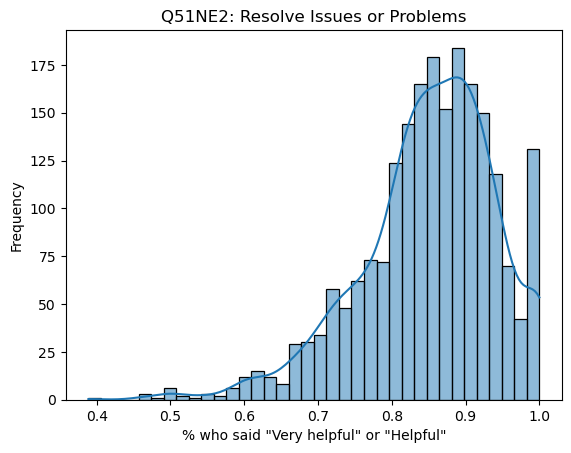

In [206]:
# Plotting the histogram for Q51NE2
sns.histplot(data=data, kde=True, x='Q51NE2')

# Adding title and labels
plt.title('Q51NE2: Resolve Issues or Problems')
plt.xlabel('% who said "Very helpful" or "Helpful"')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

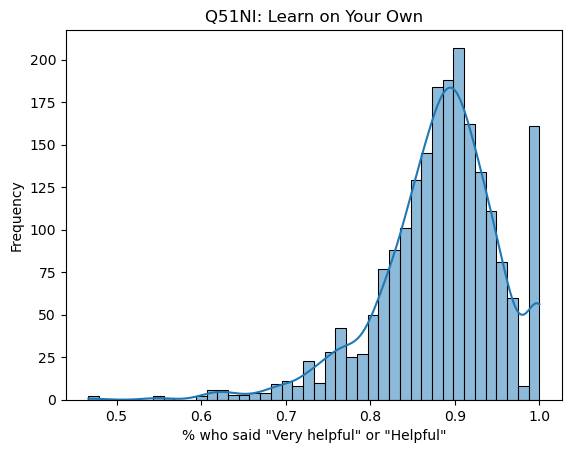

In [207]:
# Plotting the histogram for Q51NI
sns.histplot(data=data, kde=True, x='Q51NI')

# Adding title and labels
plt.title('Q51NI: Learn on Your Own')
plt.xlabel('% who said "Very helpful" or "Helpful"')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

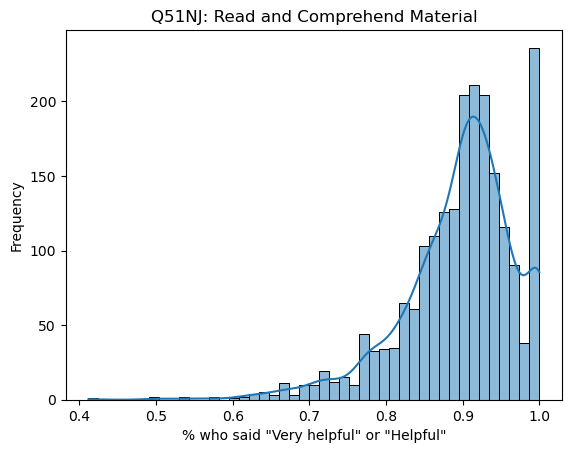

In [208]:
# Plotting the histogram for Q51NJ
sns.histplot(data=data, kde=True, x='Q51NJ')

# Adding title and labels
plt.title('Q51NJ: Read and Comprehend Material')
plt.xlabel('% who said "Very helpful" or "Helpful"')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

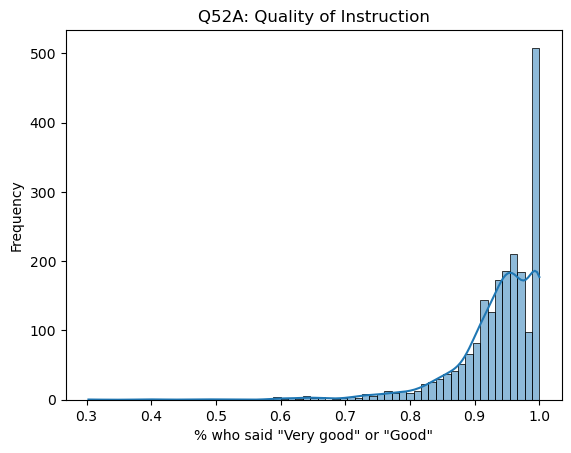

In [209]:
# Plotting the histogram for Q52A
sns.histplot(data=data, kde=True, x='Q52A')

# Adding title and labels
plt.title('Q52A: Quality of Instruction')
plt.xlabel('% who said "Very good" or "Good"')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

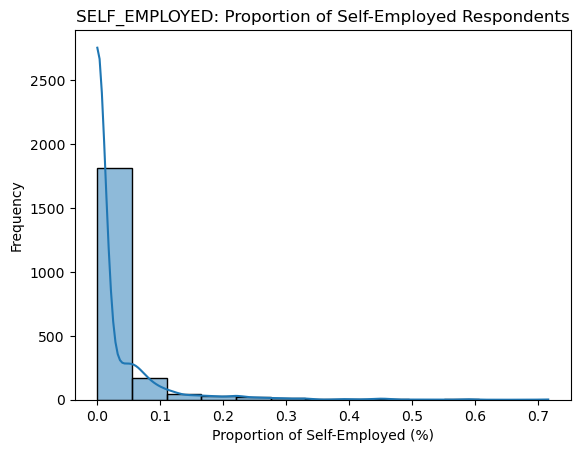

In [210]:
# Plotting the histogram for SELF_EMPLOYED
sns.histplot(data=data, kde=True, x='SELF_EMPLOYED')

# Adding title and labels
plt.title('SELF_EMPLOYED: Proportion of Self-Employed Respondents')
plt.xlabel('Proportion of Self-Employed (%)')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

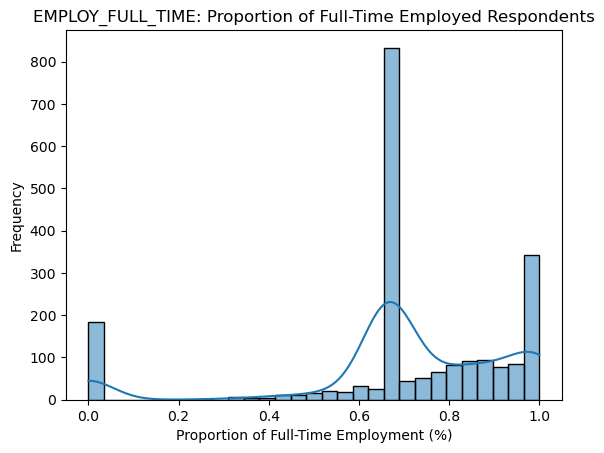

In [211]:
# Plotting the histogram for EMPLOY_FULL_TIME
sns.histplot(data=data, kde=True, x='EMPLOY_FULL_TIME')

# Adding title and labels
plt.title('EMPLOY_FULL_TIME: Proportion of Full-Time Employed Respondents')
plt.xlabel('Proportion of Full-Time Employment (%)')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

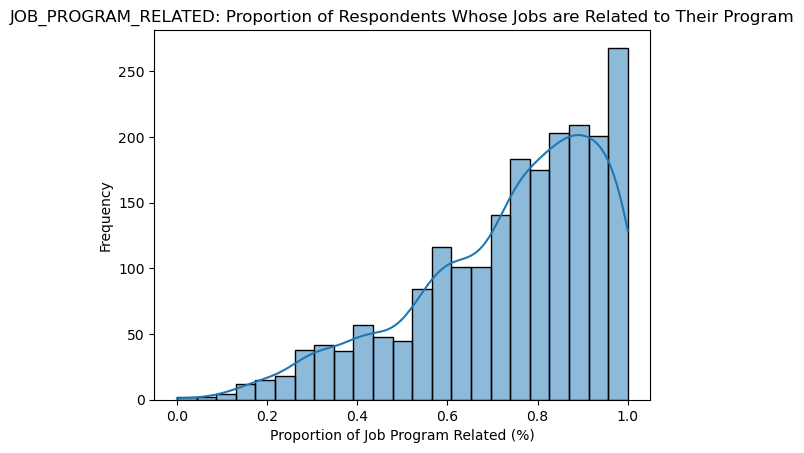

In [212]:
# Plotting the histogram for JOB_PROGRAM_RELATED
sns.histplot(data=data, kde=True, x='JOB_PROGRAM_RELATED')

# Adding title and labels
plt.title('JOB_PROGRAM_RELATED: Proportion of Respondents Whose Jobs are Related to Their Program')
plt.xlabel('Proportion of Job Program Related (%)')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

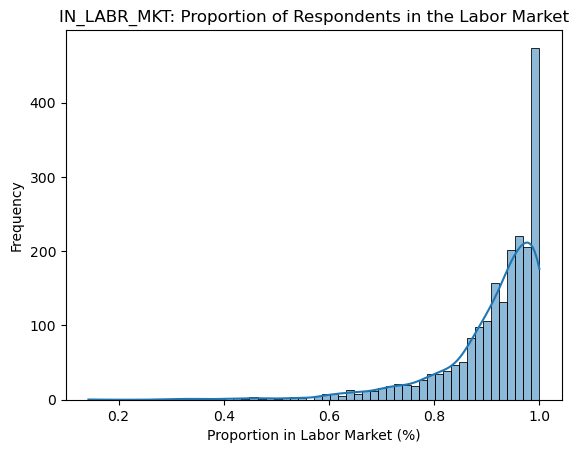

In [213]:
# Plotting the histogram for IN_LABR_MKT
sns.histplot(data=data, kde=True, x='IN_LABR_MKT')

# Adding title and labels
plt.title('IN_LABR_MKT: Proportion of Respondents in the Labor Market')
plt.xlabel('Proportion in Labor Market (%)')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

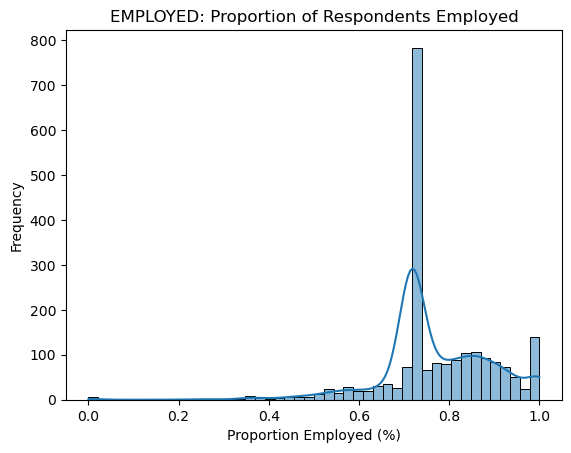

In [214]:
# Plotting the histogram for EMPLOYED
sns.histplot(data=data, kde=True, x='EMPLOYED')

# Adding title and labels
plt.title('EMPLOYED: Proportion of Respondents Employed')
plt.xlabel('Proportion Employed (%)')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

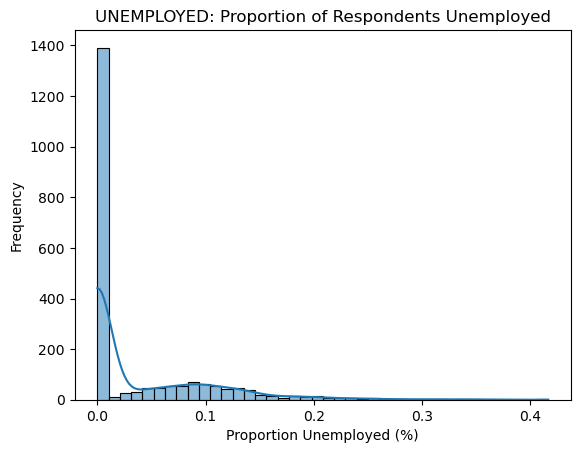

In [215]:
# Plotting the histogram for UNEMPLOYED
sns.histplot(data=data, kde=True, x='UNEMPLOYED')

# Adding title and labels
plt.title('UNEMPLOYED: Proportion of Respondents Unemployed')
plt.xlabel('Proportion Unemployed (%)')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

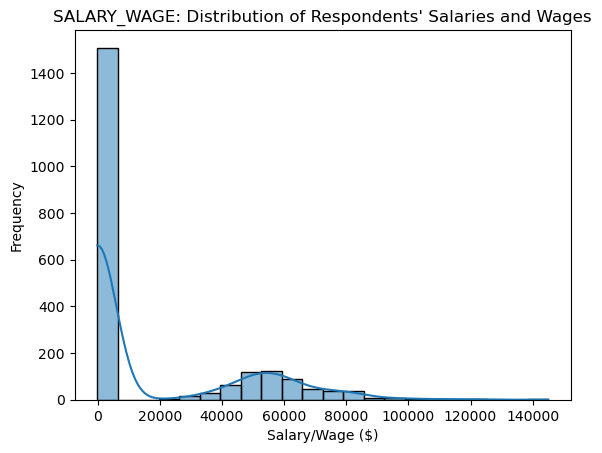

In [217]:
# Plotting the histogram for SALARY_WAGE
sns.histplot(data=data, kde=True, x='SALARY_WAGE')

# Adding title and labels
plt.title('SALARY_WAGE: Distribution of Respondents\' Salaries and Wages')
plt.xlabel('Salary/Wage ($)')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

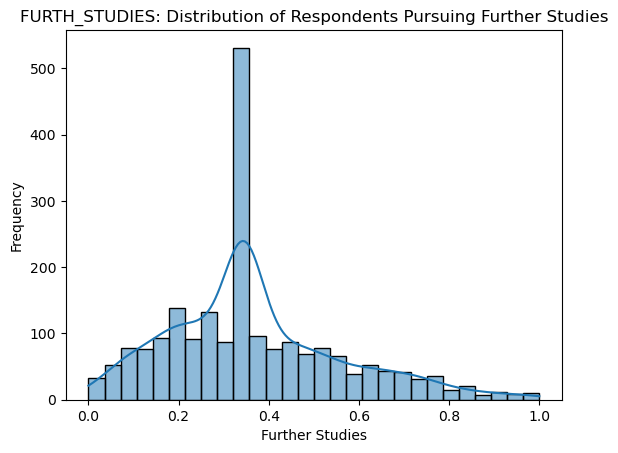

In [218]:
# Plotting the histogram for FURTH_STUDIES
sns.histplot(data=data, kde=True, x='FURTH_STUDIES')

# Adding title and labels
plt.title('FURTH_STUDIES: Distribution of Respondents Pursuing Further Studies')
plt.xlabel('Further Studies')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

## Mean Satisfaction with Education or Training (Q49A)

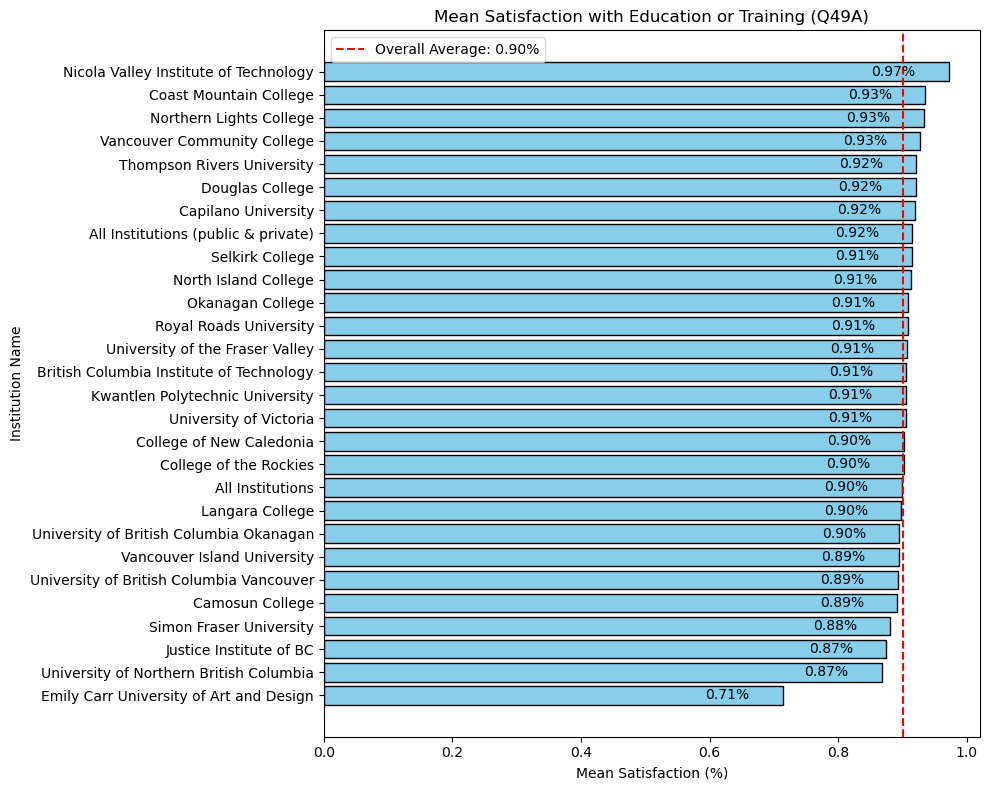

In [221]:
# Calculate the mean for 'Q49A' for each institution
mean_satisfaction_q49a = data.groupby("INSTITUTION_NAME")["Q49A"].mean().sort_values(ascending=True)

# Calculate the overall average percentage for Q49A
overall_average_q49a = mean_satisfaction_q49a.mean()

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(10, 8))

# Horizontal bar chart for mean satisfaction
mean_bars_q49a = plt.barh(mean_satisfaction_q49a.index, mean_satisfaction_q49a.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Education or Training (Q49A)')
plt.xlabel('Mean Satisfaction (%)')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars_q49a:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', color='Black')

# Adding a vertical line for the average percentage
plt.axvline(overall_average_q49a, color='red', linestyle='--', label=f'Overall Average: {overall_average_q49a:.2f}%')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


# Mean Satisfaction with Writing Skills (Q51NA)

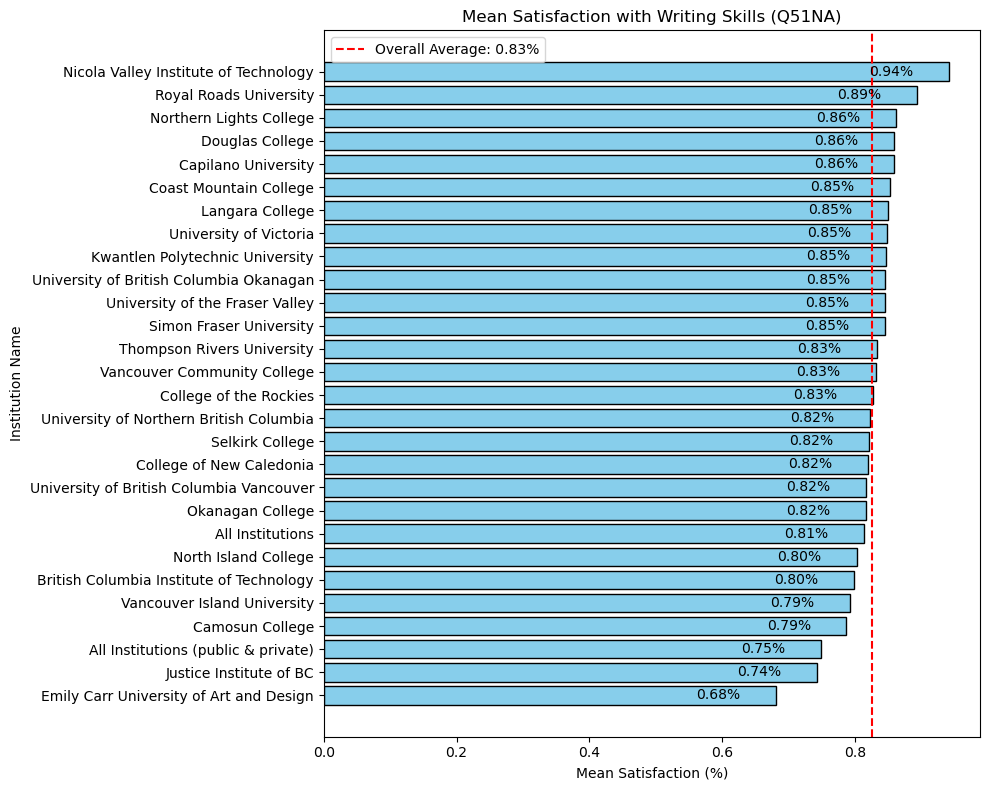

In [223]:
# Calculate the mean for 'Q51NA' for each institution
mean_satisfaction_q51na = data.groupby("INSTITUTION_NAME")["Q51NA"].mean().sort_values(ascending=True)

# Calculate the overall average percentage for Q51NA
overall_average_q51na = mean_satisfaction_q51na.mean()

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(10, 8))

# Horizontal bar chart for mean satisfaction
mean_bars_q51na = plt.barh(mean_satisfaction_q51na.index, mean_satisfaction_q51na.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Writing Skills (Q51NA)')
plt.xlabel('Mean Satisfaction (%)')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars_q51na:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', color='Black')

# Adding a vertical line for the average percentage
plt.axvline(overall_average_q51na, color='red', linestyle='--', label=f'Overall Average: {overall_average_q51na:.2f}%')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Mean Satisfaction with Speaking Skills

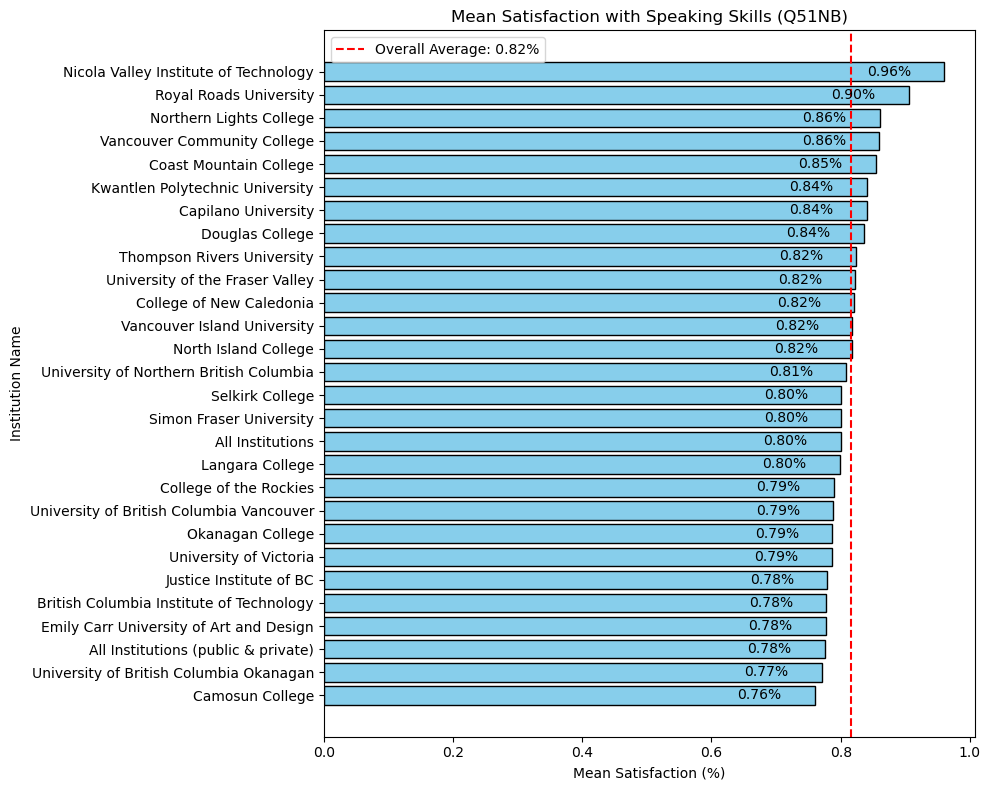

In [224]:
# Calculate the mean for 'Q51NB' for each institution
mean_satisfaction_q51nb = data.groupby("INSTITUTION_NAME")["Q51NB"].mean().sort_values(ascending=True)

# Calculate the overall average percentage for Q51NB
overall_average_q51nb = mean_satisfaction_q51nb.mean()

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(10, 8))

# Horizontal bar chart for mean satisfaction
mean_bars_q51nb = plt.barh(mean_satisfaction_q51nb.index, mean_satisfaction_q51nb.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Speaking Skills (Q51NB)')
plt.xlabel('Mean Satisfaction (%)')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars_q51nb:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', color='Black')

# Adding a vertical line for the average percentage
plt.axvline(overall_average_q51nb, color='red', linestyle='--', label=f'Overall Average: {overall_average_q51nb:.2f}%')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


### Mean Satisfaction with Working Effectively with Others (Q51ND)

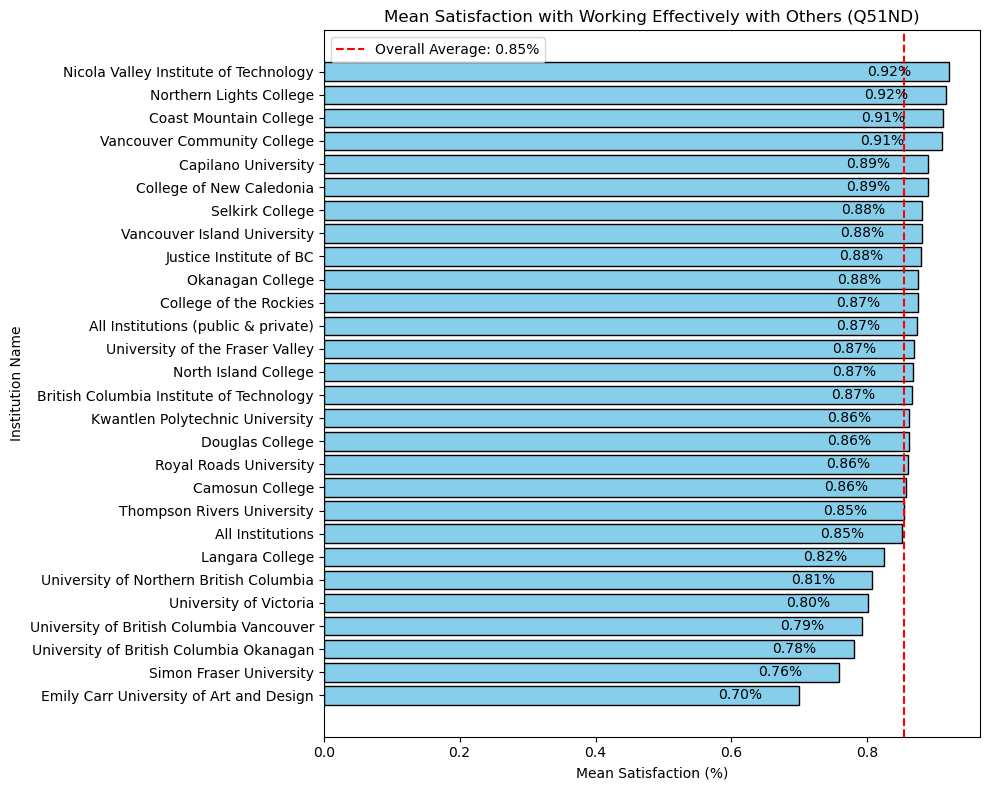

In [226]:
# Calculate the mean for 'Q51ND' for each institution
mean_satisfaction_q51nd = data.groupby("INSTITUTION_NAME")["Q51ND"].mean().sort_values(ascending=True)

# Calculate the overall average percentage for Q51ND
overall_average_q51nd = mean_satisfaction_q51nd.mean()

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(10, 8))

# Horizontal bar chart for mean satisfaction
mean_bars_q51nd = plt.barh(mean_satisfaction_q51nd.index, mean_satisfaction_q51nd.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Working Effectively with Others (Q51ND)')
plt.xlabel('Mean Satisfaction (%)')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars_q51nd:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', color='Black')

# Adding a vertical line for the average percentage
plt.axvline(overall_average_q51nd, color='red', linestyle='--', label=f'Overall Average: {overall_average_q51nd:.2f}%')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


### Mean Satisfaction with Analyzing and Thinking Critically

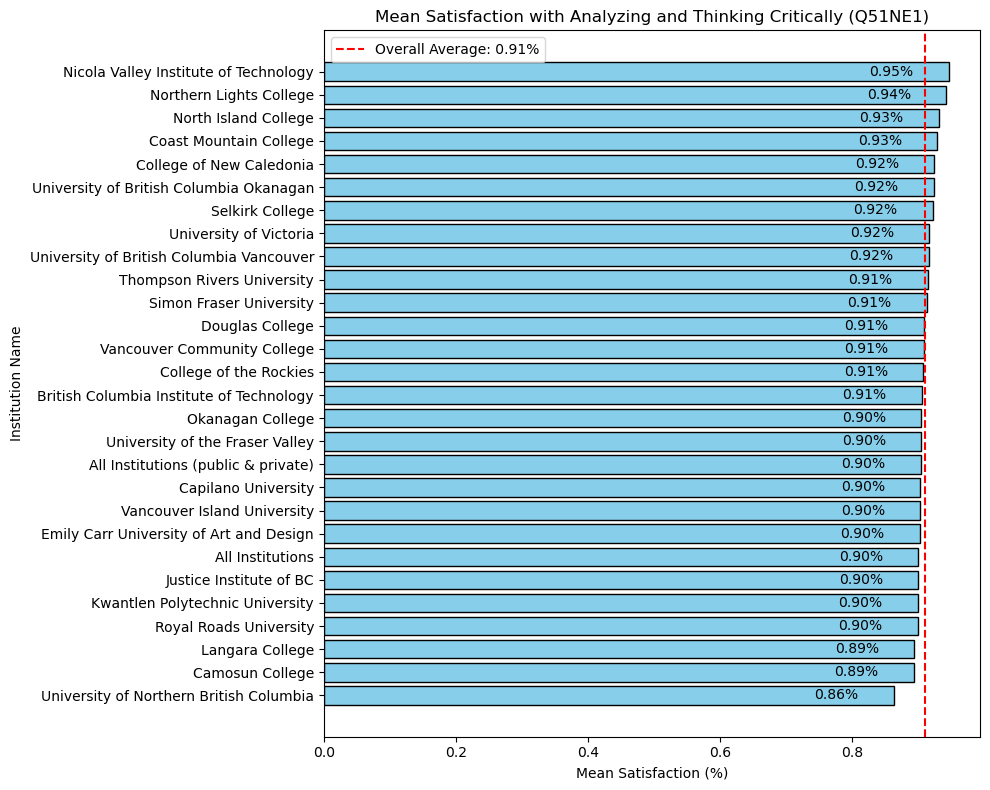

In [227]:
# Calculate the mean for 'Q51NE1' for each institution
mean_satisfaction_q51ne1 = data.groupby("INSTITUTION_NAME")["Q51NE1"].mean().sort_values(ascending=True)

# Calculate the overall average percentage for Q51NE1
overall_average_q51ne1 = mean_satisfaction_q51ne1.mean()

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(10, 8))

# Horizontal bar chart for mean satisfaction
mean_bars_q51ne1 = plt.barh(mean_satisfaction_q51ne1.index, mean_satisfaction_q51ne1.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Analyzing and Thinking Critically (Q51NE1)')
plt.xlabel('Mean Satisfaction (%)')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars_q51ne1:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', color='Black')

# Adding a vertical line for the average percentage
plt.axvline(overall_average_q51ne1, color='red', linestyle='--', label=f'Overall Average: {overall_average_q51ne1:.2f}%')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


### Mean Satisfaction with Resolving Issues or Problems 

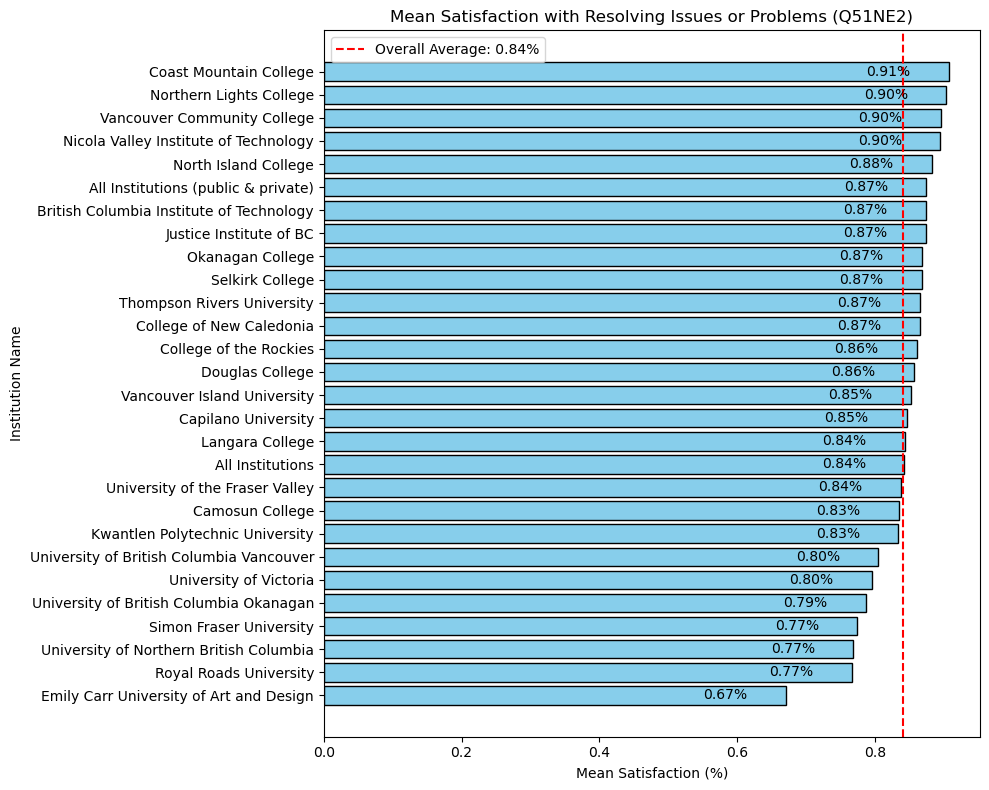

In [228]:
# Calculate the mean for 'Q51NE2' for each institution
mean_satisfaction_q51ne2 = data.groupby("INSTITUTION_NAME")["Q51NE2"].mean().sort_values(ascending=True)

# Calculate the overall average percentage for Q51NE2
overall_average_q51ne2 = mean_satisfaction_q51ne2.mean()

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(10, 8))

# Horizontal bar chart for mean satisfaction
mean_bars_q51ne2 = plt.barh(mean_satisfaction_q51ne2.index, mean_satisfaction_q51ne2.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Resolving Issues or Problems (Q51NE2)')
plt.xlabel('Mean Satisfaction (%)')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars_q51ne2:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', color='Black')

# Adding a vertical line for the average percentage
plt.axvline(overall_average_q51ne2, color='red', linestyle='--', label=f'Overall Average: {overall_average_q51ne2:.2f}%')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Mean Satisfaction with Learning on Your Own

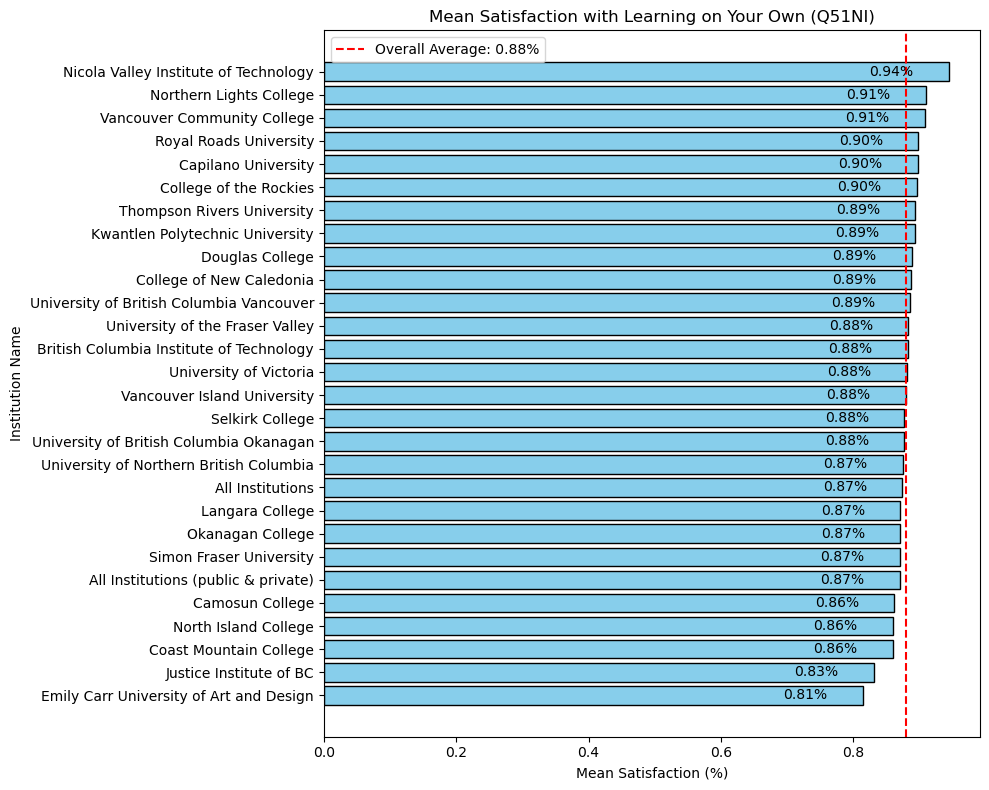

In [229]:
# Calculate the mean for 'Q51NI' for each institution
mean_satisfaction_q51ni = data.groupby("INSTITUTION_NAME")["Q51NI"].mean().sort_values(ascending=True)

# Calculate the overall average percentage for Q51NI
overall_average_q51ni = mean_satisfaction_q51ni.mean()

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(10, 8))

# Horizontal bar chart for mean satisfaction
mean_bars_q51ni = plt.barh(mean_satisfaction_q51ni.index, mean_satisfaction_q51ni.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Learning on Your Own (Q51NI)')
plt.xlabel('Mean Satisfaction (%)')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars_q51ni:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', color='Black')

# Adding a vertical line for the average percentage
plt.axvline(overall_average_q51ni, color='red', linestyle='--', label=f'Overall Average: {overall_average_q51ni:.2f}%')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Mean Satisfaction with Reading and Comprehending Material

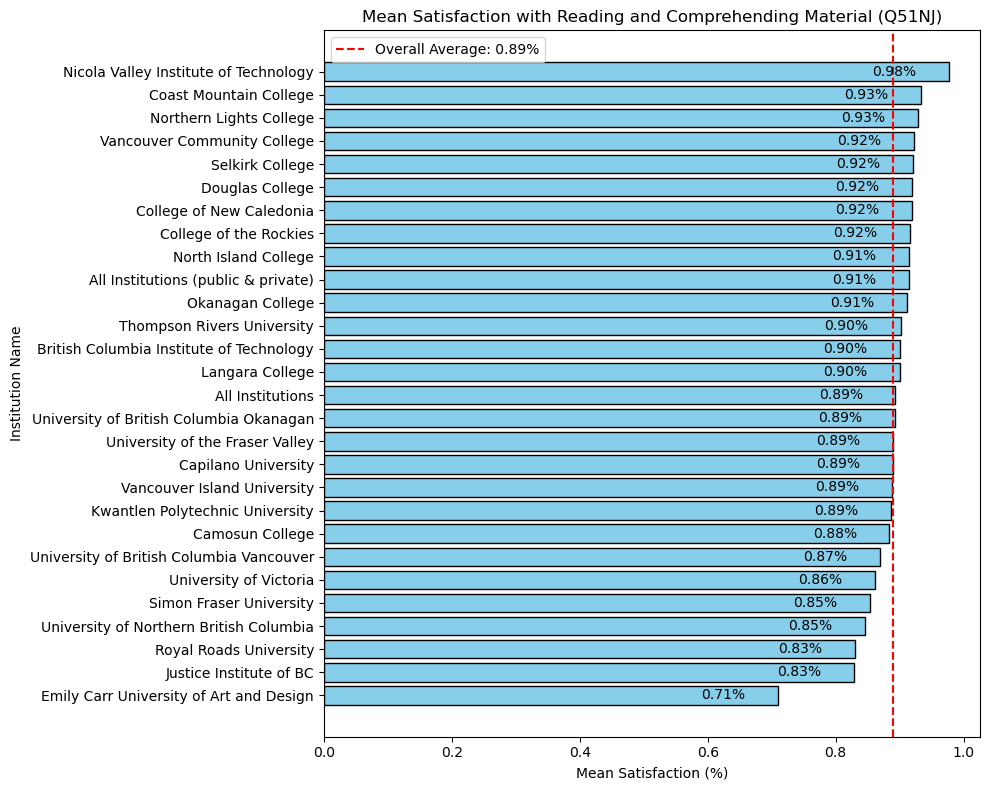

In [230]:
# Calculate the mean for 'Q51NJ' for each institution
mean_satisfaction_q51nj = data.groupby("INSTITUTION_NAME")["Q51NJ"].mean().sort_values(ascending=True)

# Calculate the overall average percentage for Q51NJ
overall_average_q51nj = mean_satisfaction_q51nj.mean()

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(10, 8))

# Horizontal bar chart for mean satisfaction
mean_bars_q51nj = plt.barh(mean_satisfaction_q51nj.index, mean_satisfaction_q51nj.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Reading and Comprehending Material (Q51NJ)')
plt.xlabel('Mean Satisfaction (%)')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars_q51nj:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', color='Black')

# Adding a vertical line for the average percentage
plt.axvline(overall_average_q51nj, color='red', linestyle='--', label=f'Overall Average: {overall_average_q51nj:.2f}%')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


# Satisfaction with education by program area

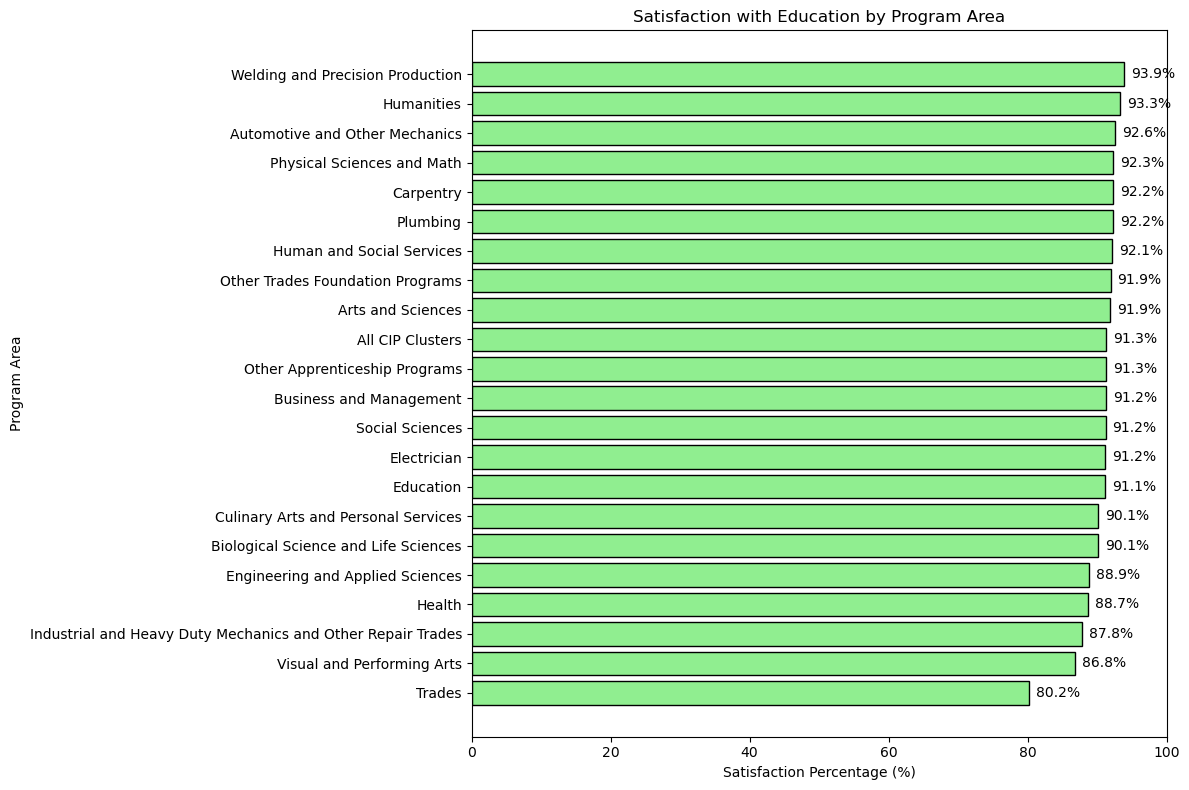

In [232]:
# Group by program area and calculate the mean satisfaction percentage
satisfaction_by_program_area = data.groupby('PROGRAM_AREA_NAME')['Q49A'].mean() * 100

# Sort the values for better visualization
satisfaction_by_program_area = satisfaction_by_program_area.sort_values()

# Plotting the average satisfaction percentages for each program area
plt.figure(figsize=(12, 8))
bars = plt.barh(satisfaction_by_program_area.index, satisfaction_by_program_area.values, color='lightgreen', edgecolor='black')
plt.title('Satisfaction with Education by Program Area')
plt.xlabel('Satisfaction Percentage (%)')
plt.ylabel('Program Area')
plt.xlim(0, 100)  # Set limits for x-axis

# Add percentage labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()

# Helpfulness in Skill Development :
Former students were asked how helpful their program was in their development of a number of skills.Percentages are based on respondents who said their program was very helpful or helpful in developing the skill.

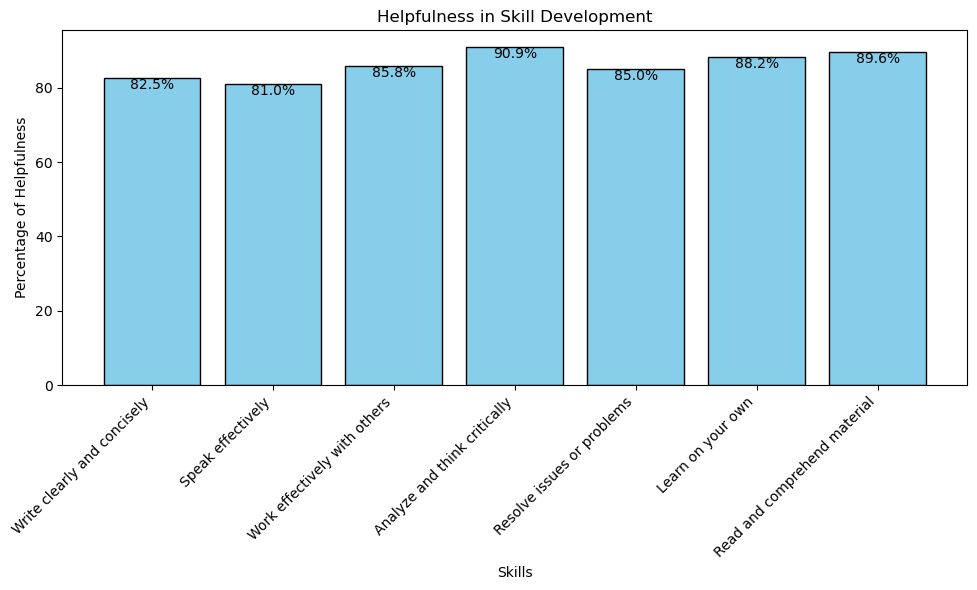

In [233]:
# Define skill columns and their labels
skill_columns = ["Q51NA", "Q51NB", "Q51ND", "Q51NE1", "Q51NE2", "Q51NI", "Q51NJ"]
skill_labels = [
    "Write clearly and concisely",
    "Speak effectively",
    "Work effectively with others",
    "Analyze and think critically",
    "Resolve issues or problems",
    "Learn on your own",
    "Read and comprehend material"
]

# Calculate the helpfulness percentages for each skill
skill_helpfulness = data[skill_columns].mean() * 100

# Plot with custom labels
plt.figure(figsize=(10, 6))
bars = plt.bar(skill_labels, skill_helpfulness, color='skyblue', edgecolor='black')
plt.title('Helpfulness in Skill Development')
plt.xlabel('Skills')
plt.ylabel('Percentage of Helpfulness')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for bar, percent in zip(bars, skill_helpfulness):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3, f'{percent:.1f}%',
             ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

# Working in a program-related job by program area

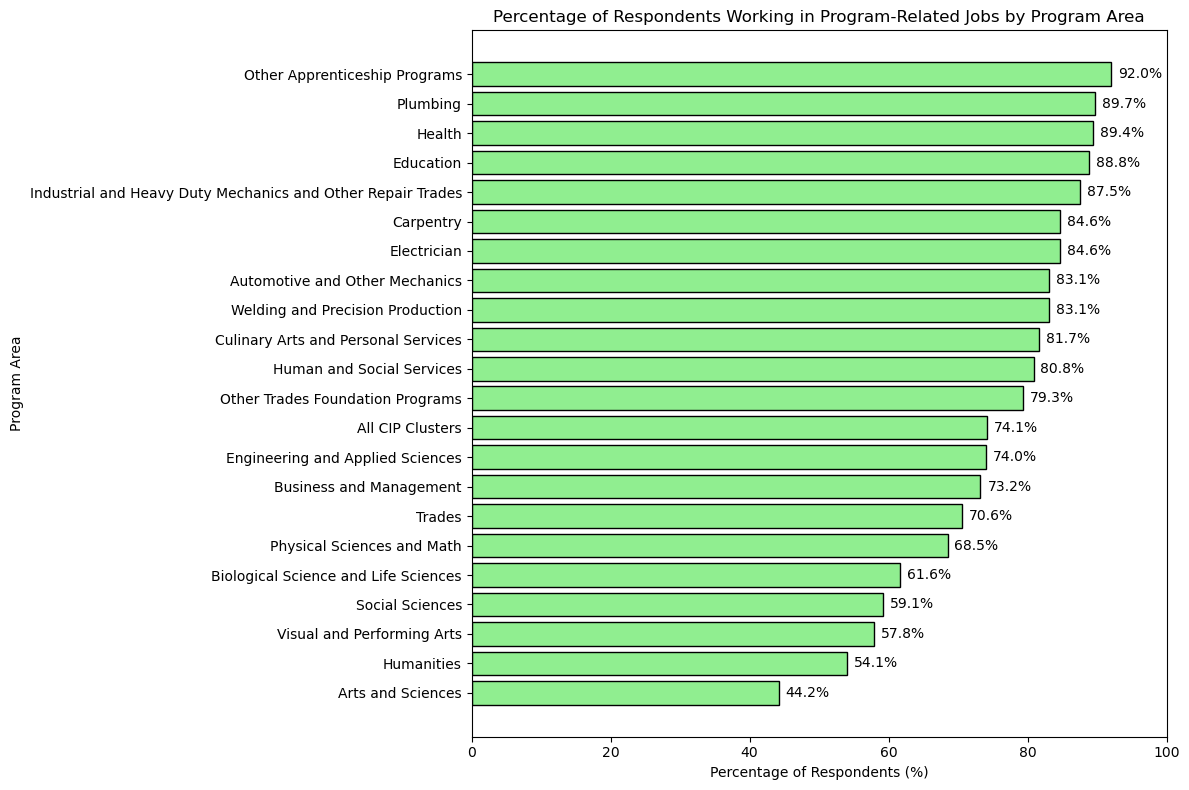

In [234]:
#Group by program area and calculate the mean percentage of respondents working in a program-related job
job_related_by_program_area = data.groupby('PROGRAM_AREA_NAME')['JOB_PROGRAM_RELATED'].mean() * 100

# Sort the values for better visualization
job_related_by_program_area = job_related_by_program_area.sort_values()

# Plotting the average percentages for each program area
plt.figure(figsize=(12, 8))
bars = plt.barh(job_related_by_program_area.index, job_related_by_program_area.values, color='lightgreen', edgecolor='black')
plt.title('Percentage of Respondents Working in Program-Related Jobs by Program Area')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Program Area')
plt.xlim(0, 100)  # Set limits for x-axis

# Add percentage labels on top of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()

# Knowledge and skills gained useful in performing job by program area

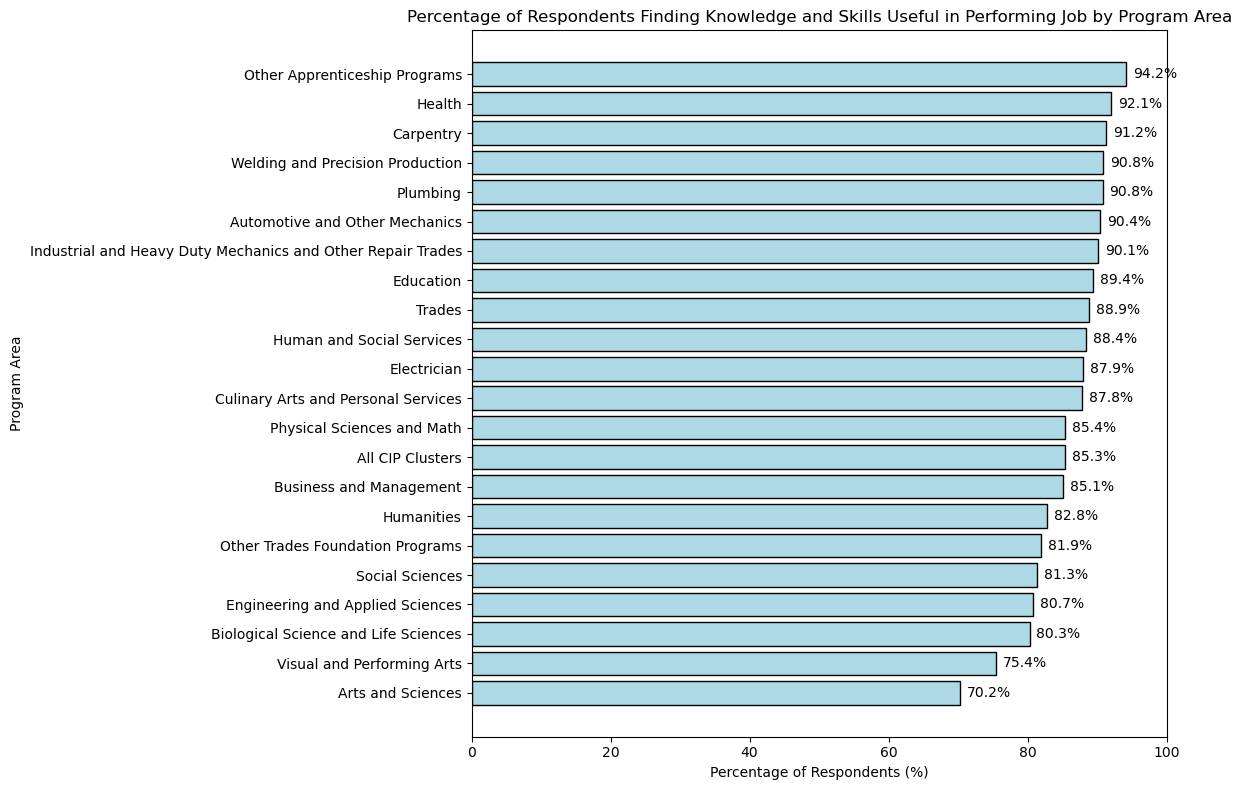

In [235]:
# Group by program area and calculate the mean percentage of respondents who found their education useful for their job
usefulness_by_program_area = data.groupby('PROGRAM_AREA_NAME')['USEFUL_PERFORM_JOB'].mean() * 100

# Sort the values for better visualization
usefulness_by_program_area = usefulness_by_program_area.sort_values()

# Plotting the average percentages for each program area
plt.figure(figsize=(12, 8))
bars = plt.barh(usefulness_by_program_area.index, usefulness_by_program_area.values, color='lightblue', edgecolor='black')
plt.title('Percentage of Respondents Finding Knowledge and Skills Useful in Performing Job by Program Area')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Program Area')
plt.xlim(0, 100)  # Set limits for x-axis

# Add percentage labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()

#  Outlier Detection

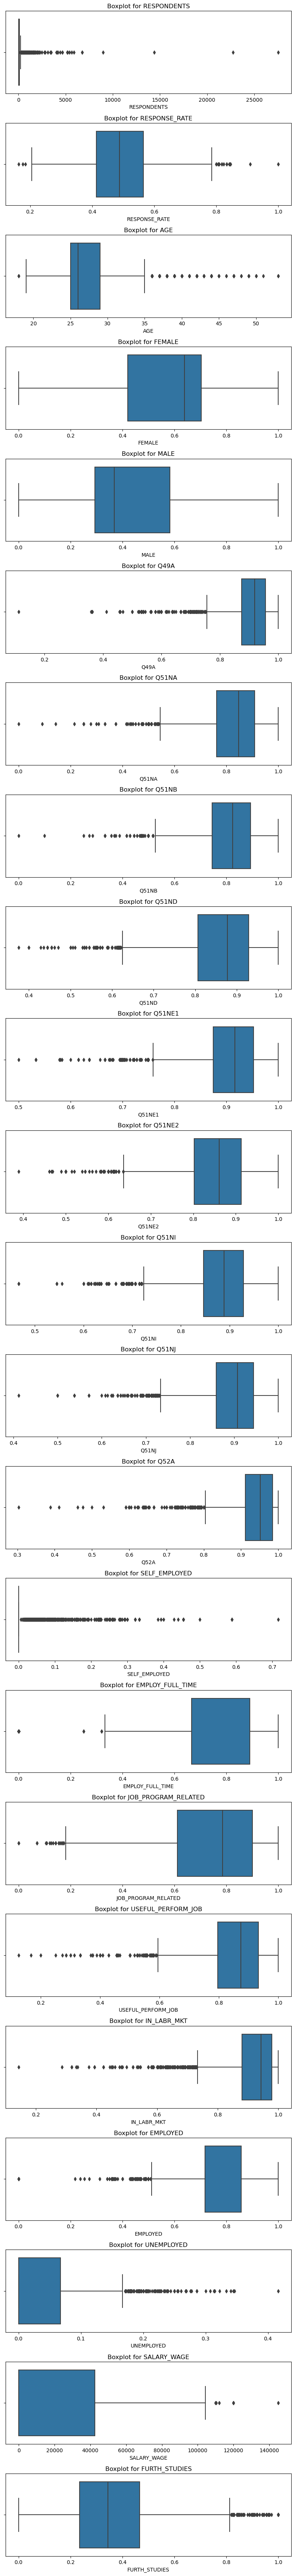

In [237]:
numerical_columns = data.select_dtypes(include=['number'])
fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=1, figsize=(8, len(numerical_columns.columns) * 3))

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")

# Adjust layout
plt.tight_layout()
plt.show()

In [238]:
# IQR Capping Method for Numerical Columns
def cap_outliers_iqr(dataframe, multiplier=1.5):
    # Select only numerical columns
    numerical_df = dataframe.select_dtypes(include=[np.number])

    # Calculate Q1, Q3, and IQR for each numerical column
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for numerical columns
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Cap outliers for numerical columns only
    for col in numerical_df.columns:
        dataframe[col] = np.where(
            dataframe[col] < lower_bound[col], lower_bound[col],
            np.where(dataframe[col] > upper_bound[col], upper_bound[col], dataframe[col])
        )

    return dataframe


# Apply capping to outliers on numerical columns only
df= cap_outliers_iqr(data, multiplier=1.5)

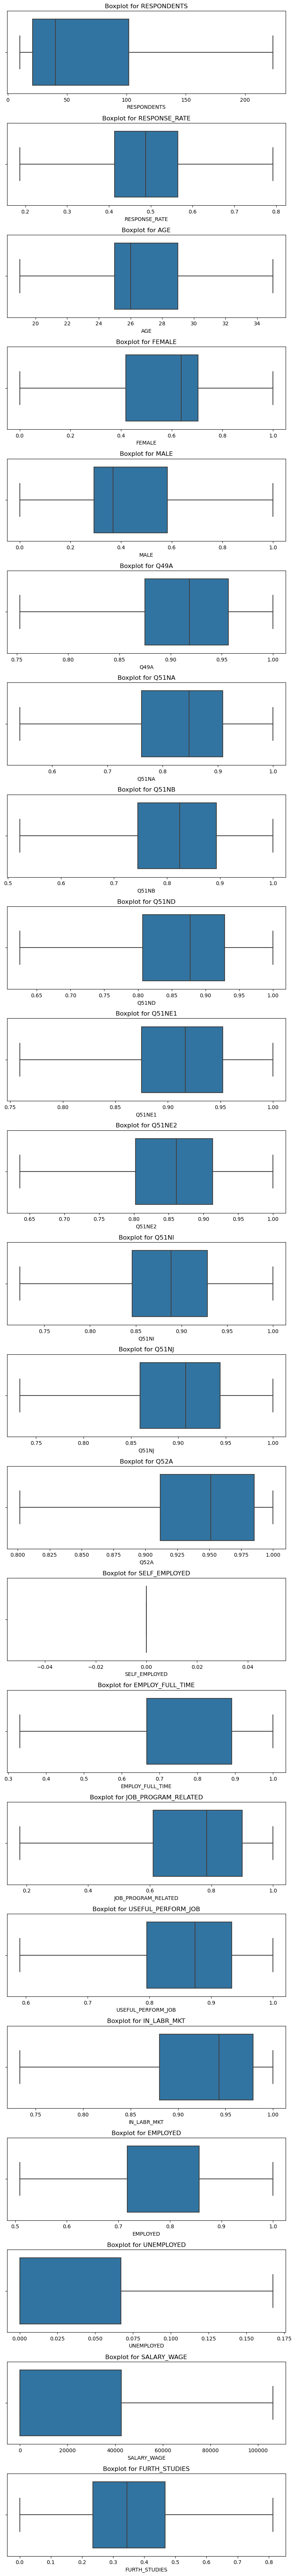

In [61]:
numerical_columns = data.select_dtypes(include=['number'])
fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=1, figsize=(8, len(numerical_columns.columns) * 3))

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")

# Adjust layout
plt.tight_layout()
plt.show()

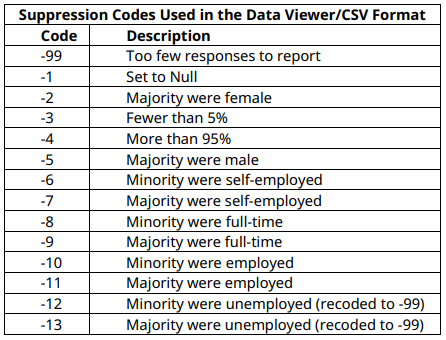

In [239]:
#Renaming Columns
# Dictionary for renaming columns
column_rename_mapping = {
    "Q49A": "Education_Satisfaction",
    "Q51NA": "Write_Clearly",
    "Q51NB": "Speak_Effectively",
    "Q51ND": "Work_Effectively",
    "Q51NE1": "Critical_Thinking",
    "Q51NE2": "Resolve_Issues",
    "Q51NI": "Self_Learning",
    "Q51NJ": "Comprehension",
    "Q52A": "Quality_Instruction"
}

# Rename the columns in the DataFrame
df.rename(columns=column_rename_mapping, inplace=True)

In [240]:
#Encoding

data_correlation = pd.DataFrame()

label_encoder = preprocessing.LabelEncoder()
data_correlation['INSTITUTION_NAME_ENCODED']= label_encoder.fit_transform(df['INSTITUTION_NAME'])

label_encoder = preprocessing.LabelEncoder()
data_correlation['GROUPBY_ENCODED']= label_encoder.fit_transform(df['GROUPBY'])

label_encoder = preprocessing.LabelEncoder()
data_correlation['PROGRAM_AREA_ENCODED']= label_encoder.fit_transform(df['PROGRAM_AREA'])

label_encoder = preprocessing.LabelEncoder()
data_correlation['PROGRAM_AREA_NAME_ENCODED']= label_encoder.fit_transform(df['PROGRAM_AREA_NAME'])

# Define the mapping dictionary to assign manually the codes for Credential
credential_mapping1 = {'Certificate': 1, 'Diploma': 2,'Trades Foundation': 3,'Apprenticeship': 4,'Associate Degree': 5,"Bachelor's Degree": 6}
data_correlation['CREDENTIAL_ENCODED']= df['CREDENTIAL'].map(credential_mapping1)

In [241]:
data_correlation.head()

INSTITUTION_NAME_ENCODED  GROUPBY_ENCODED  PROGRAM_AREA_ENCODED  \
0                        15                2                     9   
1                        15                2                     9   
2                        18                2                     6   
3                        18                2                     7   
4                        18                2                     7   

   PROGRAM_AREA_NAME_ENCODED  CREDENTIAL_ENCODED  
0                          7                   1  
1                          7                   1  
2                          4                   1  
3                         10                   1  
4                         10                   1

In [242]:
data_correlation.shape

(2102, 5)

In [243]:
#selecting columns for the correlation matrix
# Create a new DataFrame with the specified columns
columns_of_interest = [
    'RESPONDENTS',
    'RESPONSE_RATE',
    'AGE',
    'FEMALE',
    'MALE',
    'Education_Satisfaction',
    'Write_Clearly',
    'Speak_Effectively',
    'Work_Effectively',
    'Critical_Thinking',
    'Resolve_Issues',
    'Self_Learning',
    'Comprehension',
    'Quality_Instruction',
    'SELF_EMPLOYED',
    'EMPLOY_FULL_TIME',
    'JOB_PROGRAM_RELATED',
    'USEFUL_PERFORM_JOB',
    'IN_LABR_MKT',
    'EMPLOYED',
    'UNEMPLOYED',
    'SALARY_WAGE',
    'FURTH_STUDIES',

]

# Select the columns from the original DataFrame
new_columns_data  = df[columns_of_interest]

# Combine the existing data_correlation DataFrame with the new columns
data_correlation = pd.concat([data_correlation, new_columns_data.reset_index(drop=True)], axis=1)

INSTITUTION_NAME_ENCODED  GROUPBY_ENCODED  \
INSTITUTION_NAME_ENCODED                   1.000000        -0.063930   
GROUPBY_ENCODED                           -0.063930         1.000000   
PROGRAM_AREA_ENCODED                      -0.101351        -0.157335   
PROGRAM_AREA_NAME_ENCODED                  0.082498         0.203272   
CREDENTIAL_ENCODED                         0.327323        -0.013542   
RESPONDENTS                               -0.061723         0.140763   
RESPONSE_RATE                             -0.224623        -0.001049   
AGE                                       -0.034560        -0.009891   
FEMALE                                     0.129130        -0.031553   
MALE                                      -0.118705         0.020257   
Education_Satisfaction                     0.001429        -0.014555   
Write_Clearly                              0.053246        -0.056997   
Speak_Effectively                          0.073945        -0.018969   
Work_Effectively                          -0.074766         0.016400   
Critical_Thinking                          0.034519        -0.013883   
Resolve_Issues                            -0.093589         0.003642   
Self_Learning                              0.039433        -0.024038   
Comprehension                             -0.052694         0.005711   
Quality_Instruction                       -0.031008        -0.014806   
SELF_EMPLOYED                                   NaN              NaN   
EMPLOY_FULL_TIME                          -0.007049         0.061210   
JOB_PROGRAM_RELATED                       -0.043515         0.032890   
USEFUL_PERFORM_JOB                         0.005867         0.021136   
IN_LABR_MKT                               -0.045611        -0.009324   
EMPLOYED                                  -0.024954         0.038403   
UNEMPLOYED                                -0.055491         0.087132   
SALARY_WAGE                                0.322018        -0.030718   
FURTH_STUDIES                              0.096116         0.024193   

                           PROGRAM_AREA_ENCODED  PROGRAM_AREA_NAME_ENCODED  \
INSTITUTION_NAME_ENCODED              -0.101351                   0.082498   
GROUPBY_ENCODED                       -0.157335                   0.203272   
PROGRAM_AREA_ENCODED                   1.000000                   0.325670   
PROGRAM_AREA_NAME_ENCODED              0.325670                   1.000000   
CREDENTIAL_ENCODED                    -0.230474                   0.160600   
RESPONDENTS                            0.100241                  -0.207798   
RESPONSE_RATE                          0.171579                  -0.042320   
AGE                                    0.183209                  -0.000620   
FEMALE                                 0.008471                   0.008520   
MALE                                  -0.000139                  -0.012426   
Education_Satisfaction                -0.075135                  -0.055530   
Write_Clearly                         -0.199574                  -0.181571   
Speak_Effectively                     -0.019586                  -0.025630   
Work_Effectively                       0.171584                  -0.066755   
Critical_Thinking                     -0.051369                   0.045499   
Resolve_Issues                         0.088465                  -0.087863   
Self_Learning                         -0.025762                  -0.001611   
Comprehension                         -0.047975                  -0.053551   
Quality_Instruction                   -0.079666                  -0.068106   
SELF_EMPLOYED                               NaN                        NaN   
EMPLOY_FULL_TIME                       0.048969                  -0.058919   
JOB_PROGRAM_RELATED                    0.299082                   0.058367   
USEFUL_PERFORM_JOB                     0.163755                   0.061472   
IN_LABR_MKT                            0.132571                   

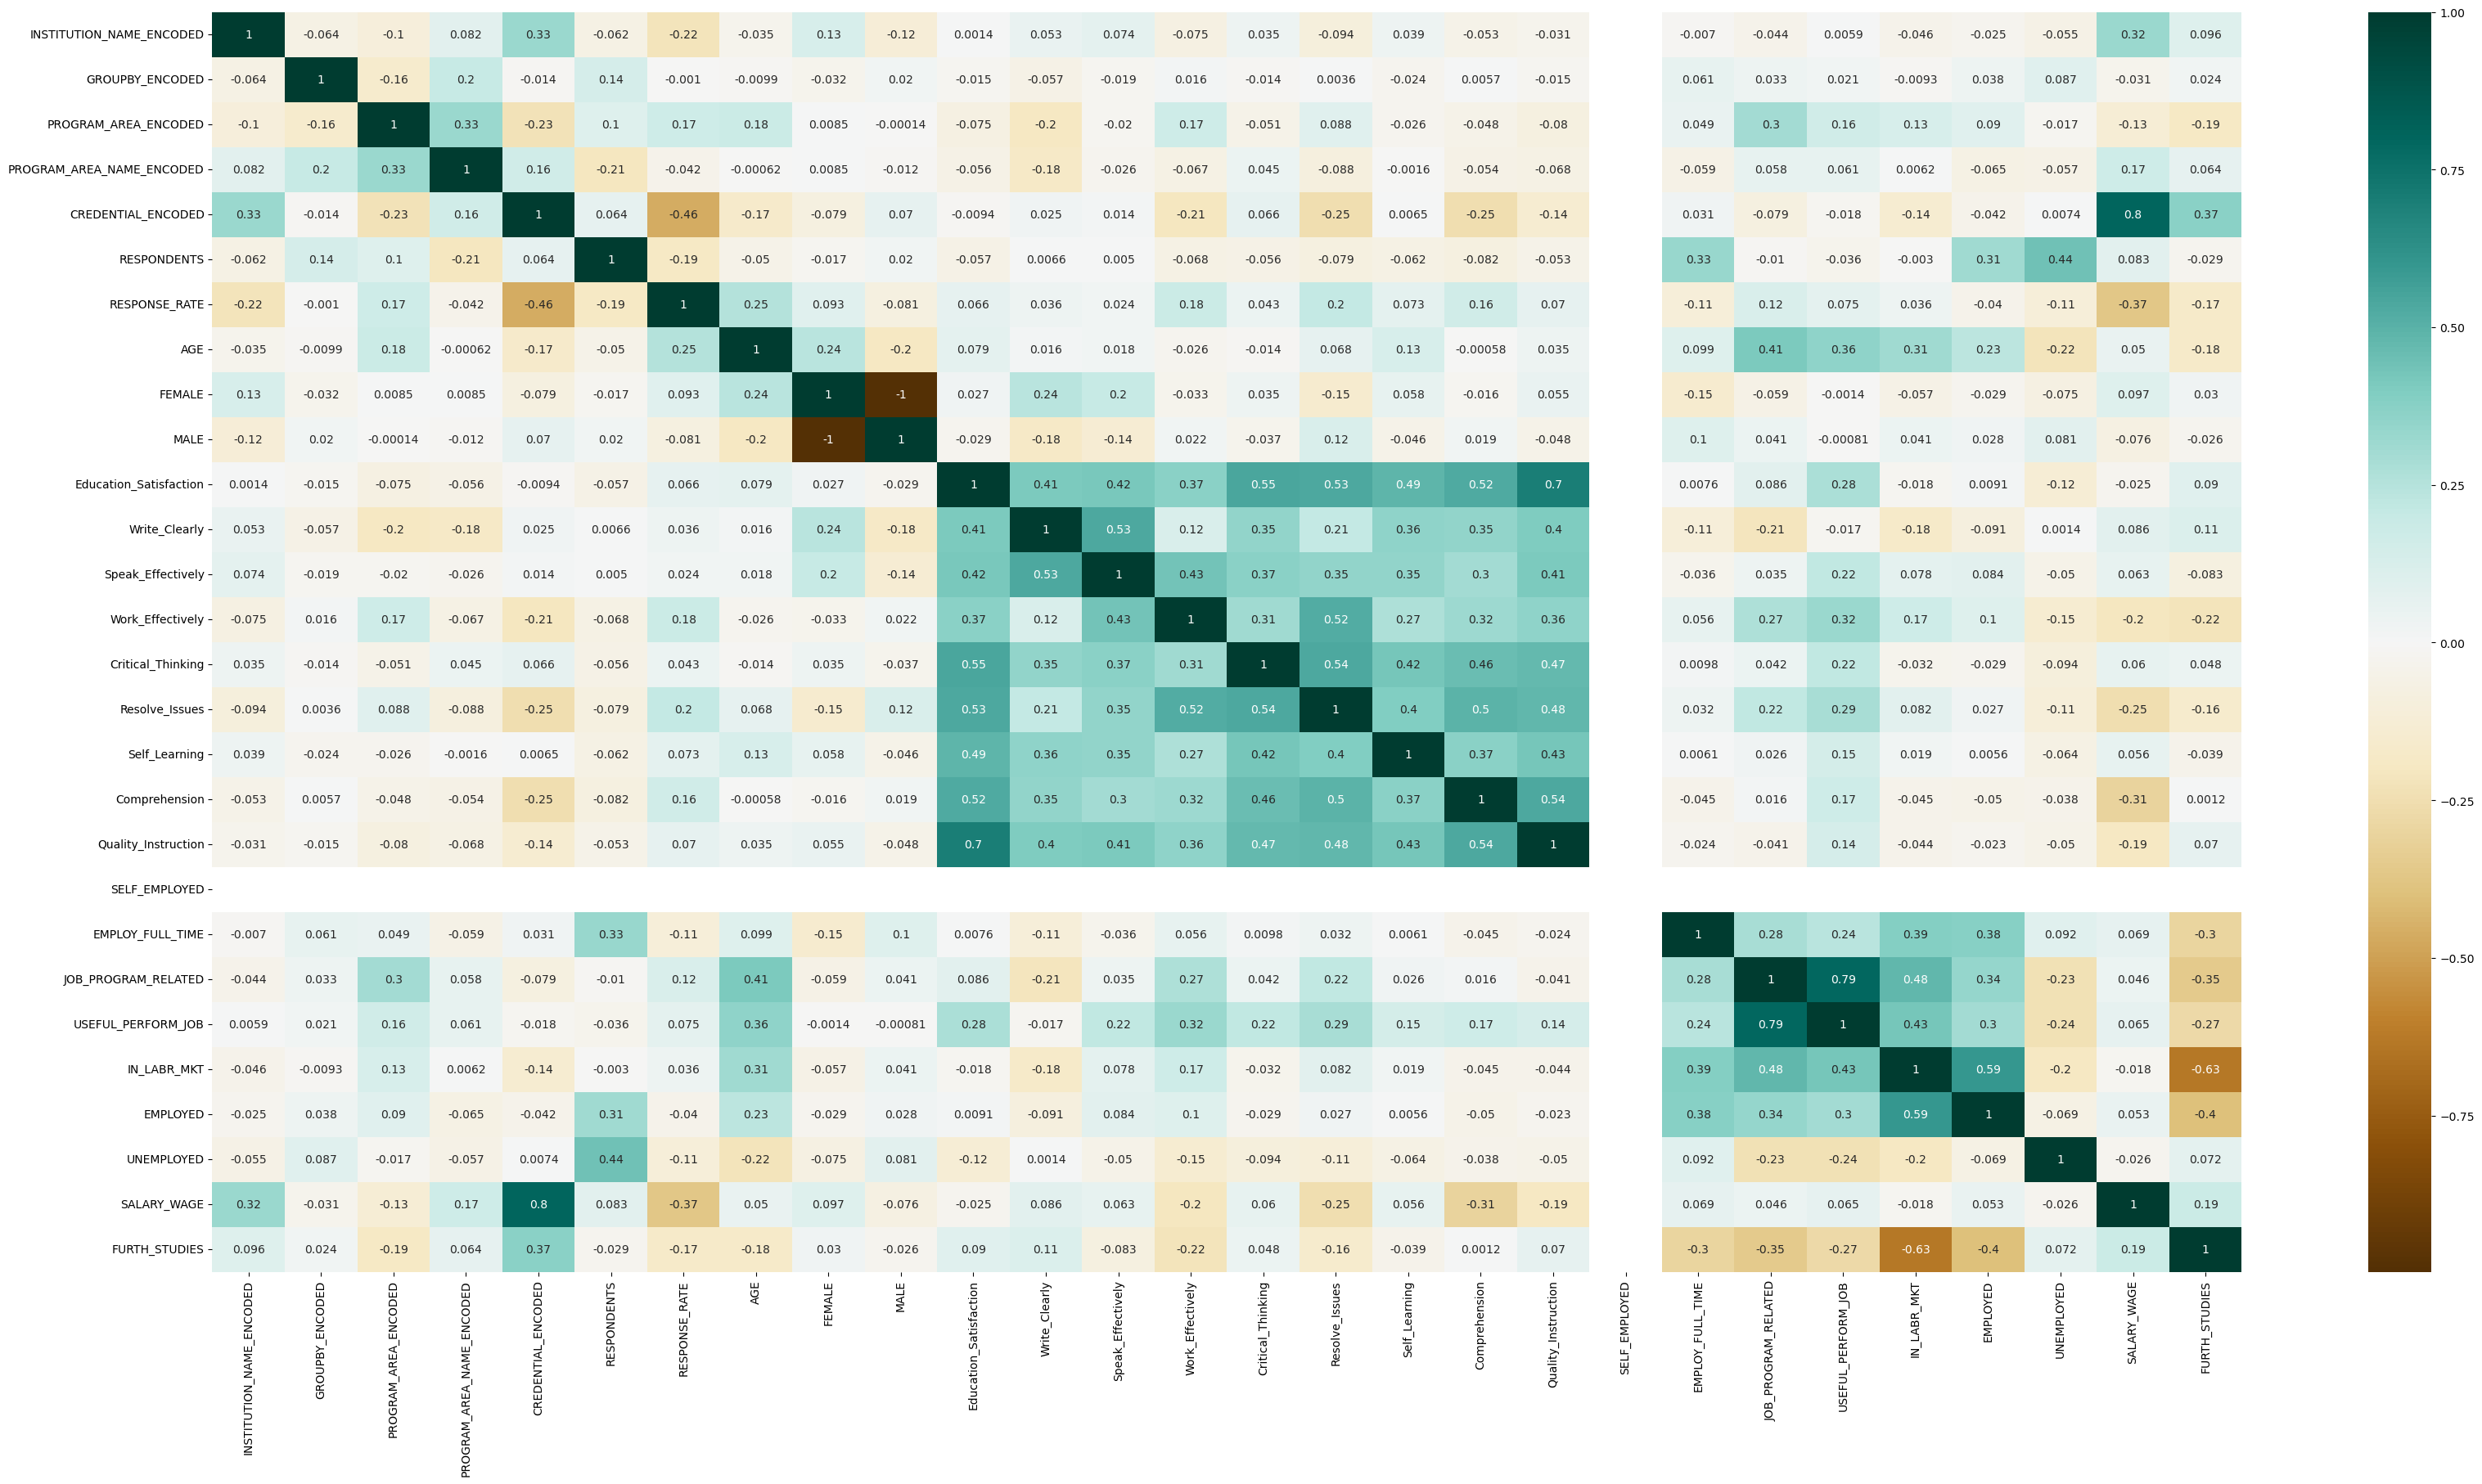

In [244]:
plt.figure(figsize=(40,20))
c= data_correlation.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [245]:
data_correlation.to_csv('CareerPaths.csv')